### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [2]:
# сделайте разделение изначального набора данных в этой ячейке
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# загружаем данные из sprint 1: update_data.csv
if os.path.exists('../data/initial_data.csv'):
    df = pd.read_csv('../data/initial_data.csv')

print(df.shape)

target= 'price' 

# разбиение на выборки
df_train, df_validate, df_test = \
    np.split(df.sample(frac=1, random_state=42),
             [int(0.6*len(df)), int(0.8*len(df))])

print('numpy split X_train: ', df_train.drop(columns=['price']).shape, ' df_validate: ', df_validate.drop(columns=['price']).shape, ' df_test: ', df_test.drop(columns=['price']).shape)

X_train = df_train.drop(columns=['price'])
y_train = df_train['price']

X_valid = df_validate.drop(columns=['price'])
y_valid = df_validate['price']

X_test = df_test.drop(columns=['price'])
y_test = df_test['price']

(123937, 19)
numpy split X_train:  (74362, 18)  df_validate:  (24787, 18)  df_test:  (24788, 18)


In [3]:
X_train.head(5)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors
103656,118258,1,0,8.000000,34.000000,3,0,57.000000,14490,1985,6,55.814289,37.817036,2.48,111,16,1,high_rise
33392,37912,2,0,9.000000,27.000000,1,0,36.000000,16266,1995,4,55.652931,37.746994,2.64,83,10,1,high_rise
62330,71079,3,0,10.000000,18.000000,1,0,44.200001,2418,1958,1,55.810669,37.638306,3.00,290,11,1,high_rise
52090,59382,12,0,9.000000,36.700001,2,0,76.000000,22118,2012,2,55.828106,37.487892,3.00,141,30,1,high_rise
95519,108995,14,0,97.099998,53.000000,3,0,97.099998,20818,2008,2,55.704510,37.512836,3.00,414,24,1,high_rise


#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


In [35]:
# 2.1 Загрузка данных
import psycopg
from dotenv import load_dotenv

TABLE_NAME = "clean_cost_estimate" 

# подгружаем .env
load_dotenv()

# загрузка данных для обучения модели
connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

connection.update(postgres_credentials)

with psycopg.connect(**connection) as conn:

    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/initial_data.csv', 'wb') as fd:
    df.to_csv('../data/initial_data.csv', index=None)

In [60]:
df.head(5)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors
0,0,9,0,9.9,19.900000,1,0,35.099998,9500000,6220,1965,6,55.717113,37.781120,2.64,84,12,1,high_rise
1,1,7,0,43.0,16.600000,1,0,43.000000,13500000,18012,2001,2,55.794849,37.608013,3.00,97,10,1,high_rise
2,2,9,0,9.0,32.000000,2,0,56.000000,13500000,17821,2000,4,55.740040,37.761742,2.70,80,10,1,high_rise
3,3,1,0,10.1,43.099998,3,0,76.000000,20000000,18579,2002,4,55.672016,37.570877,2.64,771,17,1,high_rise
4,4,3,0,3.0,14.000000,1,0,24.000000,5200000,9293,1971,1,55.808807,37.707306,2.60,208,9,1,multy_story


In [ ]:
# 2.2. Общий обзор датасета

# базовая информация
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123937 entries, 0 to 123936
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   floor                   123937 non-null  int64  
 1   is_apartment            123937 non-null  int64  
 2   kitchen_area            123937 non-null  float64
 3   living_area             123937 non-null  float64
 4   rooms                   123937 non-null  int64  
 5   studio                  123937 non-null  int64  
 6   total_area              123937 non-null  float64
 7   price                   123937 non-null  int64  
 8   build_year              123937 non-null  int64  
 9   building_type_int       123937 non-null  int64  
 10  ceiling_height          123937 non-null  float64
 11  flats_count             123937 non-null  int64  
 12  floors_total            123937 non-null  int64  
 13  has_elevator            123937 non-null  int64  
 14  build_type_floors   

,count,mean,std,min,25%,50%,75%,max
floor,123937.0,7.443806e+00,5.689226e+00,1.000000,3.000000e+00,6.000000e+00,1.000000e+01,5.600000e+01
is_apartment,123937.0,9.480623e-03,9.690623e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
kitchen_area,123937.0,1.084924e+01,7.316802e+00,0.100000,7.000000e+00,9.000000e+00,1.150000e+01,4.363000e+02
living_area,123937.0,3.877845e+01,2.987327e+01,2.000000,2.160000e+01,3.200000e+01,4.480000e+01,8.363636e+02
rooms,123937.0,2.119416e+00,9.872045e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
studio,123937.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
total_area,123937.0,6.172883e+01,3.931421e+01,11.000000,3.910000e+01,5.250000e+01,7.100000e+01,9.200000e+02
price,123937.0,1.923366e+07,6.890131e+07,10000.000000,8.900000e+06,1.180000e+07,1.670000e+07,9.873738e+09
build_year,123937.0,1.986386e+03,2.200538e+01,1901.000000,1.969000e+03,1.984000e+03,2.006000e+03,2.023000e+03
building_type_int,123937.0,3.248013e+00,1.459814e+00,0.000000,2.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00


In [3]:
# проверка пропусков
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: float64)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree
import numpy as np
import geopy.distance
    
# Создаем дополнительные признаки
df['age'] = pd.Timestamp('today').year - df['build_year'] # возраст дома
df['floor_ratio'] = df['floor']/df['floors_total']
df['kitchen_ratio'] = df['kitchen_area'].div(df['total_area'], axis=0)
df['living_ratio'] = df['living_area']/df['total_area'].values

# агрегируем по building_id
df["building_price_mean"] = df.groupby("building_id")["price"].transform("mean")
df["building_area_mean"] = df.groupby("building_id")["total_area"].transform("mean")

# кластеризация по координатам
coords = df[["latitude","longitude"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "location_cluster"] = kmeans.fit_predict(coords)
df["location_cluster"] = df["location_cluster"].astype("int")

# кластеризация по высоте потолка
coords = df[["ceiling_height"]].dropna()
kmeans = KMeans(n_clusters=6, random_state=42)
df.loc[coords.index, "ceiling_height_cluster"] = kmeans.fit_predict(coords)
df["ceiling_height_cluster"] = df["ceiling_height_cluster"].astype("int")

# кластеризация по количеству квартир в доме
coords = df[["flats_count"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "flats_count_cluster"] = kmeans.fit_predict(coords)
df["flats_count_cluster"] = df["flats_count_cluster"].astype("int")

# в качестве фичи будем использовать удаленность от центра Москвы
# добавим служебные колонки с координататми центра Москвы
df["latitude_2"] = 55.7522
df["longitude_2"] = 37.6156

# вычислим дистанцию
df['dist_origin_dest'] = list(map(geopy.distance.geodesic, df.loc[:, ['latitude', 'longitude']].values, df.loc[:, ["latitude_2", "longitude_2"]].values))
# приведем ее к типу float
df['dist_origin_dest'] = df['dist_origin_dest'].map(lambda x: x.km)

# загружаем данные moscow_metro_stations.csv
if os.path.exists('../data/moscow_metro_stations.csv'):
    df_moscow = pd.read_csv('../data/moscow_metro_stations.csv')

# Оставляем нужные столбцы и переименовываем
# столбцыслужебные не удаляем
moscow_stations = df_moscow.drop(columns=['id', 'line_id', 'line_name', 'line_color'])
moscow_stations.columns = ['station_name', 'lat', 'lon']
        
metro_coords = np.radians([[s.lat, s.lon] for s in moscow_stations.itertuples()])

# Строим дерево
tree = BallTree(metro_coords, metric='haversine')

# Координаты квартир в радианах
flat_coords = np.radians(df[["latitude", "longitude"]].values)
flat_coords[:5]

# Ищем ближайшую станцию
distances_rad, _ = tree.query(flat_coords, k=1)
# Переводим в метры (радиус Земли ~6371 км)
df["distance_to_metro_fast"] = distances_rad[:, 0] * 6371000

# удалим служебные колонки и уже не нужные колонки с координататми
df.drop(columns=['latitude', 'longitude', 'latitude_2', 'longitude_2'], inplace=True)


In [13]:
df.head()

,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors,age,floor_ratio,kitchen_ratio,living_ratio,building_price_mean,building_area_mean,location_cluster,dist_origin_dest,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster
0,9,0,9.9,19.900000,1,0,35.099998,9500000,1965,6,2.64,84,12,1,high_rise,60,0.750000,0.282051,0.566952,9.100000e+06,41.049999,9,11.107508,732.967724,0,5
1,7,0,16.6,26.400000,1,0,43.000000,13500000,2001,2,3.00,97,10,1,high_rise,24,0.700000,0.386047,0.613953,1.873333e+07,55.966667,1,4.772297,525.649516,4,7
2,9,0,9.0,32.000000,2,0,56.000000,13500000,2000,4,2.70,80,10,1,high_rise,25,0.900000,0.160714,0.571429,1.518333e+07,60.533333,9,9.277185,538.689763,5,5
3,1,0,10.1,43.099998,3,0,76.000000,20000000,2002,4,2.64,771,17,1,high_rise,23,0.058824,0.132895,0.567105,1.477082e+07,50.200000,7,9.359522,815.506000,0,8
4,3,0,3.0,14.000000,1,0,24.000000,5200000,1971,1,2.60,208,9,1,multy_story,54,0.333333,0.125000,0.583333,7.580000e+06,28.218750,1,8.534197,1442.654973,0,1


In [ ]:
import pandas as pd
import numpy as np
import os

# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/transform_data.csv', 'wb') as fd:
    df.to_csv('../data/transform_data.csv', index=None)

In [1]:
import pandas as pd
import numpy as np
import os

# загружаем данные: update_data.csv
if os.path.exists('../data/transform_data.csv'):
    df = pd.read_csv('../data/transform_data.csv')

In [2]:
missing = df.isnull().sum().sort_values(ascending=False).T
missing[missing > 0]

Series([], dtype: int64)

In [3]:
df.columns

Index(['floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'build_year', 'building_type_int',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator',
       'build_type_floors', 'age', 'floor_ratio', 'kitchen_ratio',
       'living_ratio', 'building_price_mean', 'building_area_mean',
       'location_cluster', 'dist_origin_dest', 'distance_to_metro_fast',
       'ceiling_height_cluster', 'flats_count_cluster'],
      dtype='object')

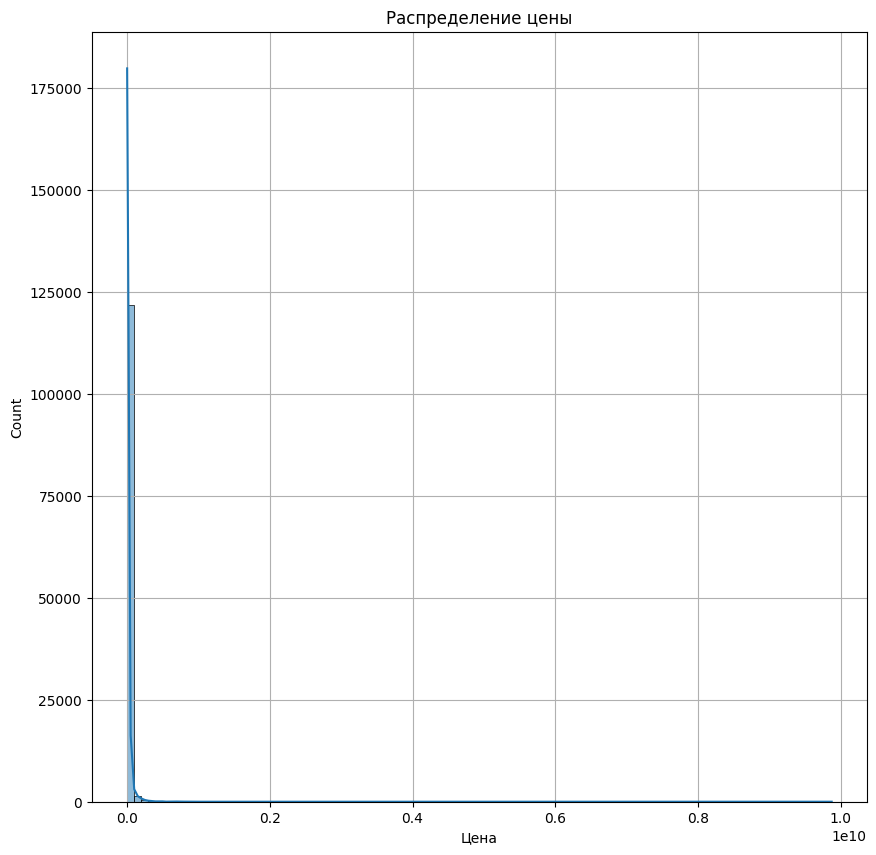

In [ ]:
# 2.3 Анализ признаков для модели

# 1) Распределение основной целевой переменной price

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.grid(True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable'))

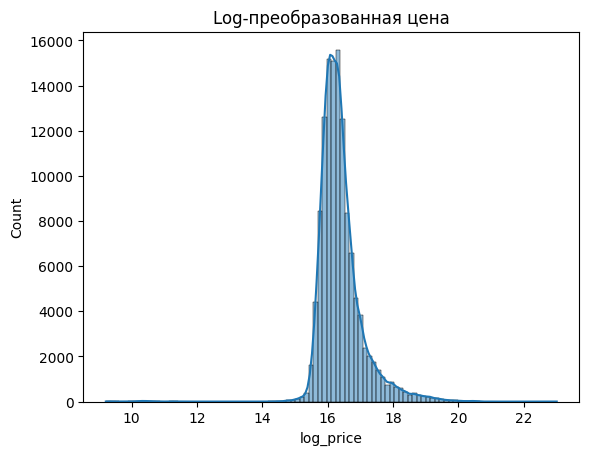

In [5]:
# 2) Также можно посмотреть логарифм:

df['log_price'] = np.log1p(df['price'])

sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Log-преобразованная цена')

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable_log'))

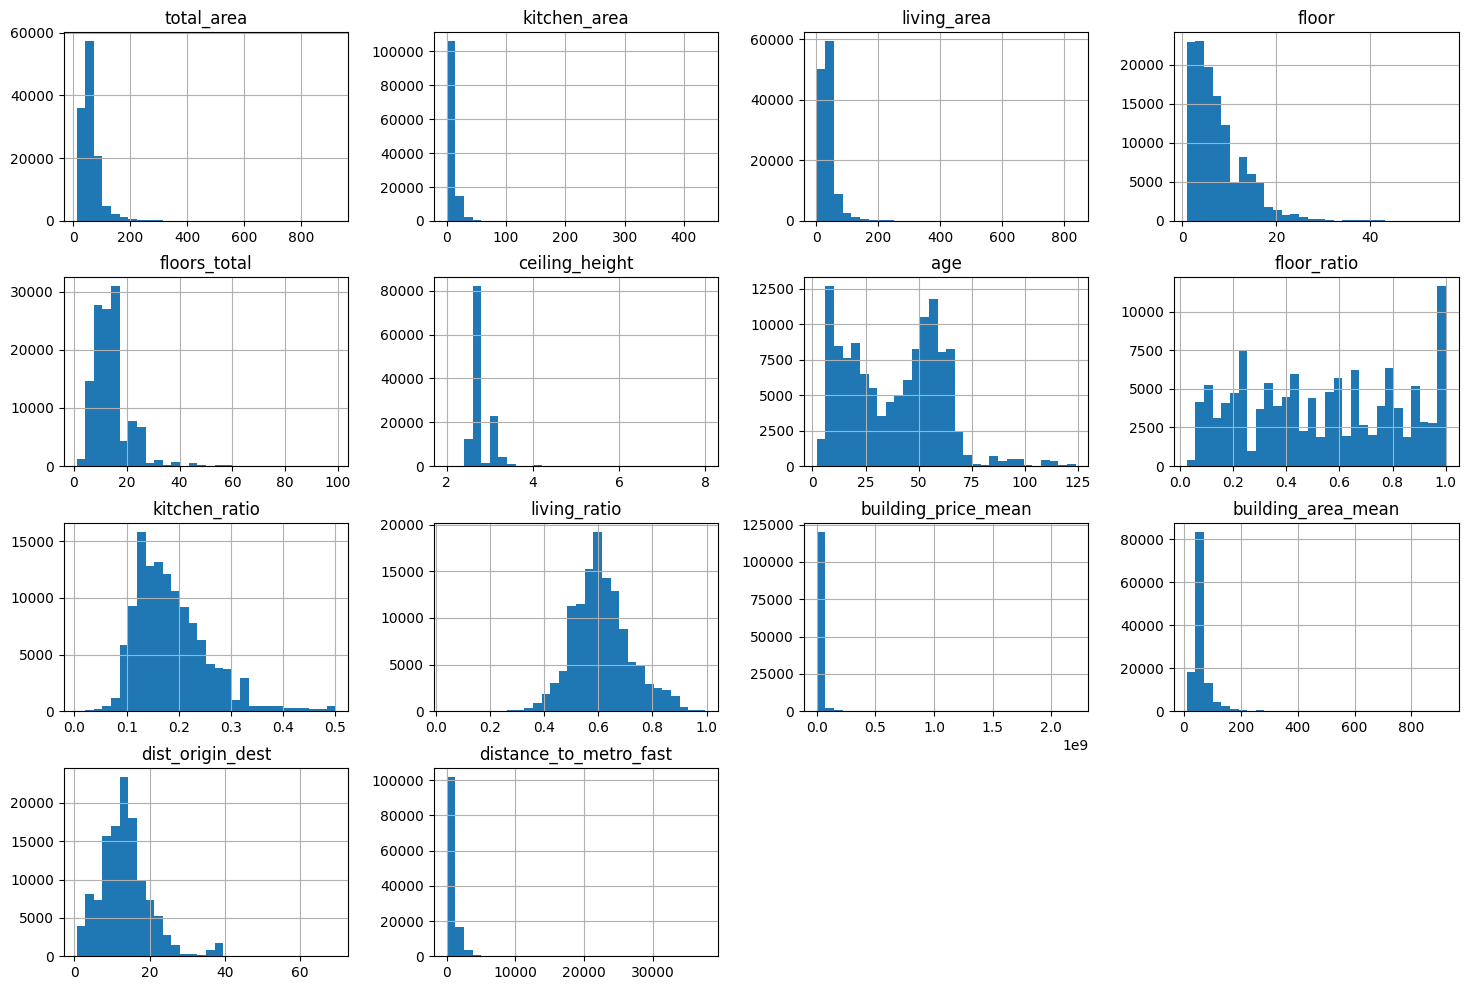

In [6]:
# 3) Посмотрим pаспределения ключевых признаков

numeric_features = [
    'total_area', 'kitchen_area', 'living_area', 'floor', 'floors_total',
    'ceiling_height', 'age', 'floor_ratio', 'kitchen_ratio', 'living_ratio',
    'building_price_mean', 'building_area_mean', 'dist_origin_dest',
    'distance_to_metro_fast'
]

df[numeric_features].hist(bins=30, figsize=(18, 12), grid=True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_features'))

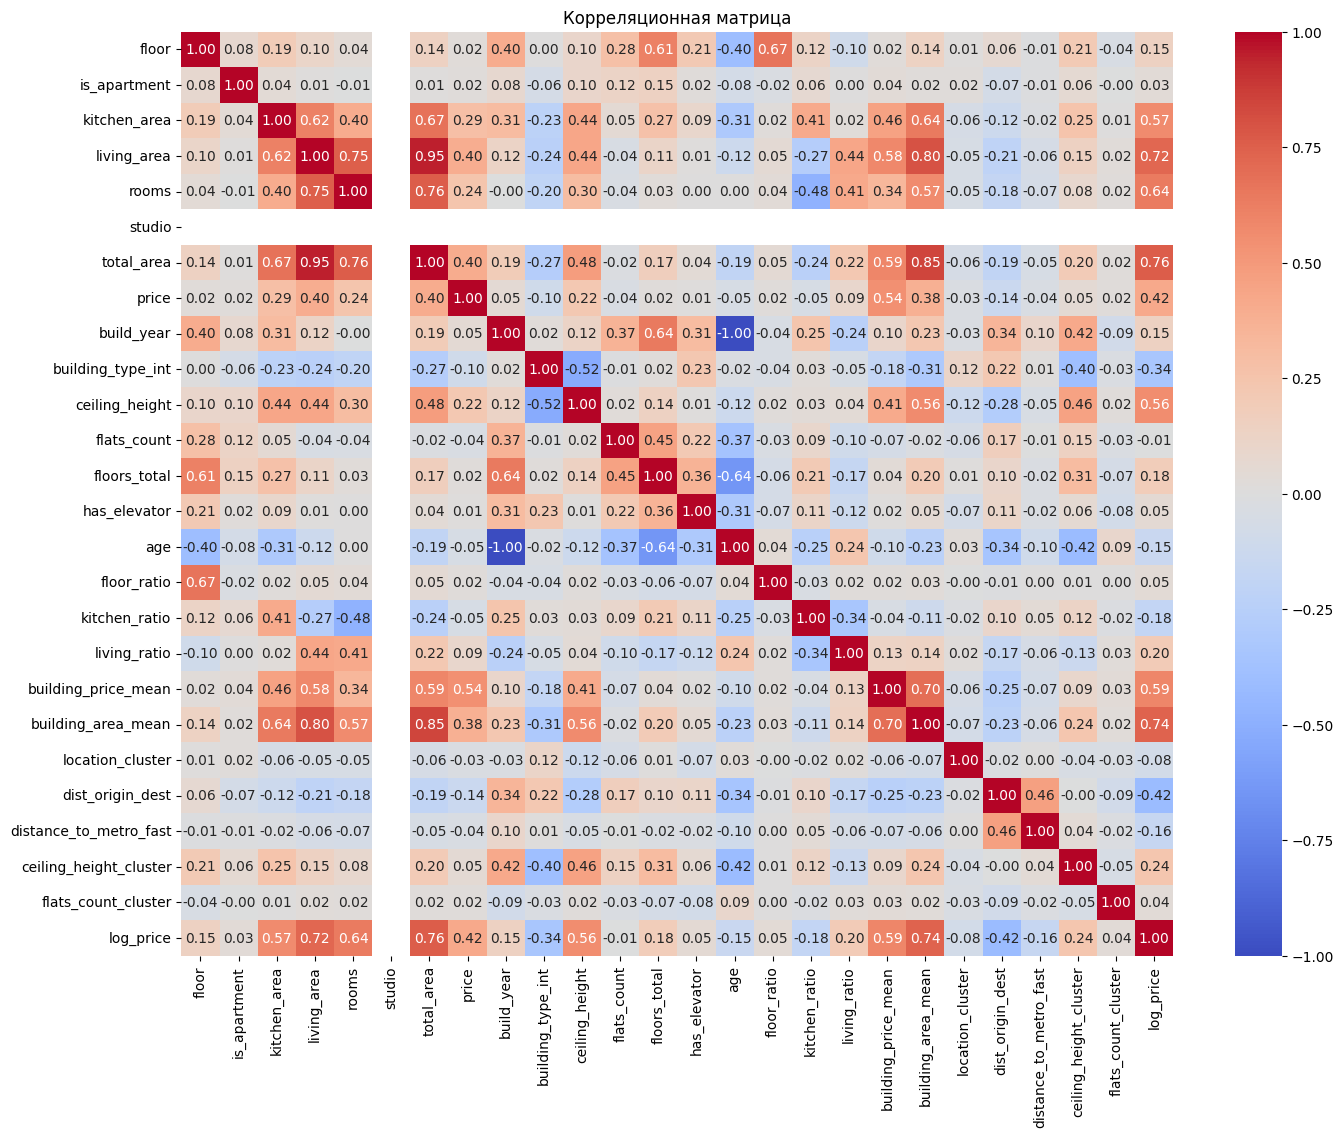

In [ ]:
# 2.4 Анализ целевой переменной, 2.4 Анализ целевой переменной в зависимости от различных признаков

# 4) Проведем корреляционный анализ

plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
# Особое внимание — на корреляции с price или log_price.

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Correlation_matrix'))

In [ ]:
# a) Целевая переменная price и log_price
# price и log_price неожиданно не сильно коррелируют между собой (0.42), но log_price сильнее и чище коррелирует 
# с признаками, поэтому лучше подходит для моделей (возможно нужно будет оставить ее)

# b) Наиболее сильные корреляты log_price (новой целевой переменной) => увеличение стоимости:
total_area              = 0.76   # Сильнейший коррелят. Ожидаемо — чем больше площадь, тем дороже
building_area_mean      = 0.74   # Размер здания связан с ценой
living_area             = 0.72   # Поддерживает тренд общей площади
rooms                   = 0.64   # Больше комнат → дороже
building_price_mean     = 0.59   # отражает среднюю цену по зданию, мощный фич
kitchen_area            = 0.57	 # Похожий эффект как на жилой и общей площади
ceiling_height          = 0.56   # Высокие потолки чаще в премиальных квартирах
ceiling_height_cluster  = 0.24   # Отражает распределение потолков — слабая +
living_ratio            = 0.20   # Незначительная положительная 
flor_total              = 0.18   # незначительная положительная
floor                   = 0.15   # Незначительно положительная
build_year              = 0.15   # Незначительно положительная
has_elevator            = 0.05   # Слабо влияет на прямую
floor_ratio	            = 0.05   # Может быть связано с типом квартиры (на первом/последнем этажах)
flats_count_cluster	    = 0.04	 # слабо влияет на прямую

# с) Отрицательные корреляции с log_price (новой целевой переменной) => уменьшение стоимости:
dist_origin_dest        = -0.42	 # Удалённость от центра города - возможно связано с тем, что это данные по Москве
distance_to_metro_fast  = -0.16  # Чем дальше от метро, тем дешевле
building_type_int       = -0.34  # тип здания влияет на снижении цены
kitchen_ratio           = -0.18  # слабая отрицательная корреляция с ценой (возможно, отражает непропорционально большие кухни в дешёвых квартирах).
age	                    = -0.15	 # Старые здания — чуть дешевле

# в данном датасете - мусорный рекивит - studio (так как везде = 0)

# d) Мультиколлинеарность — признаки с сильной корреляцией между собой
living_area - total_area                    = 0.95	# Почти одно и то же, можно оставить один
total_area - building_area_mean             = 0.85 # Очень сильно связаны, возможно лучше оставить только один
living_area - building_area_mean            = 0.80 # Очень сильно связаны, возможно лучше оставить только один
rooms - living_area                         = 0.75	# Сильно связаны, возможно лучше оставить только один
building_price_mean - building_area_mean    = 0.70	# Сильно связаны, возможно лучше оставить только один
total_area - kitchen_area                   = 0.67 # Логичная корреляция
total_area - rooms                          = 0.76 # Чем больше площадь, тем больше комнат
floor - floors_total                        = 0.61	# Более высокие этажи в высотных домах

# Нужно проверить не чувствительна ли модель к мультиколлинеарности.

# is_apartment, building_type_int и has_elevator слабо коррелируют с ценой — возможно, имеют категориальный/непрямой эффект.

In [ ]:
# e) Промежуточные выводы: 
# Для моделей оставить log_price как целевую переменную.
# Проведи отбор признаков, чтобы избежать мультиколлинеарности.
# Используй total_area, building_area_mean, living_area, rooms , building_price_mean, kitchen_area, ceiling_height, 
# dist_origin_dest, distance_to_metro_fast, building_type_int как основу модели — они показывают сильную связь с ценой.
# Категориальные признаки (build_type_floors, location_cluster, ceiling_height_cluster, flats_count_cluster) могут быть 
# важны через one-hot или catboost encoding.

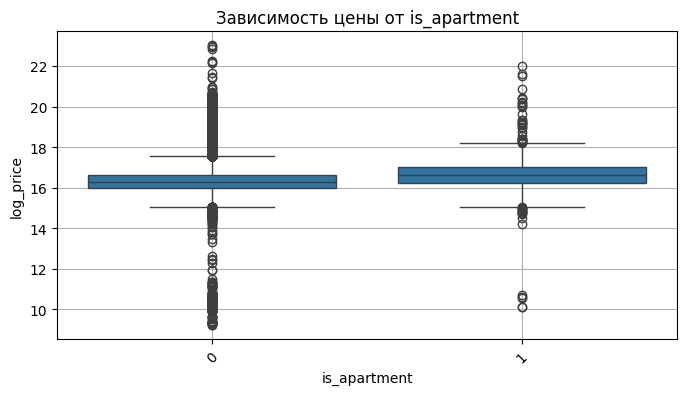

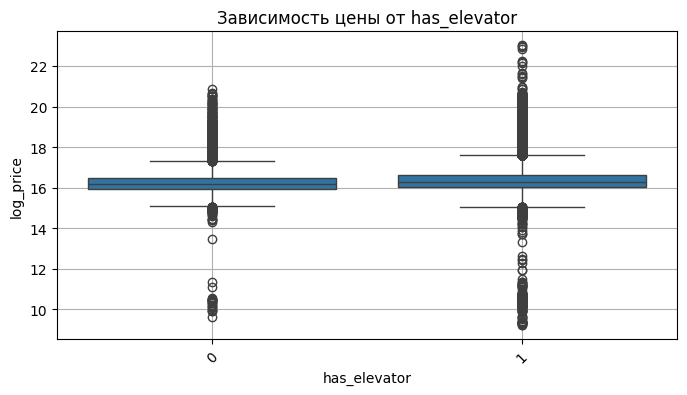

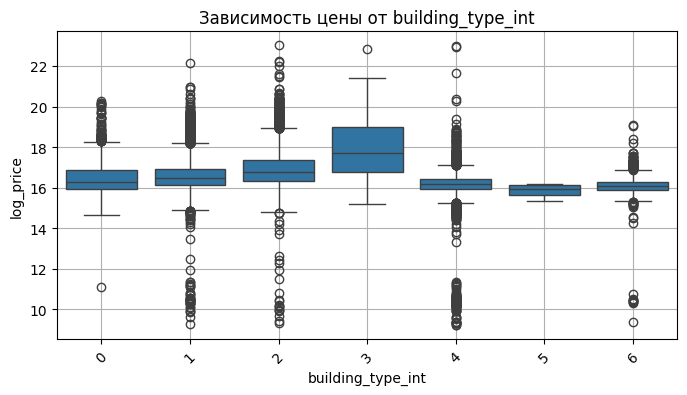

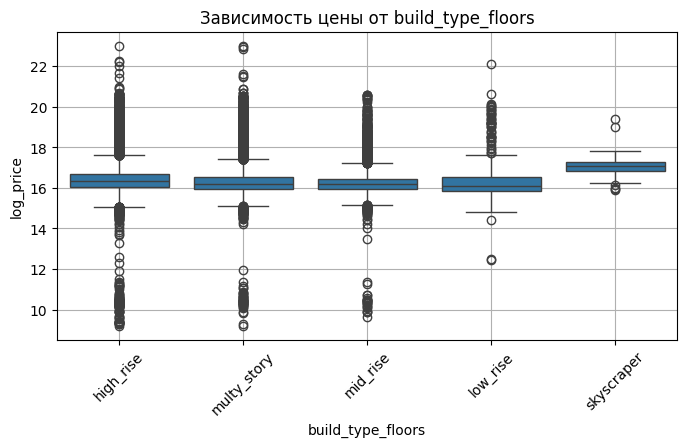

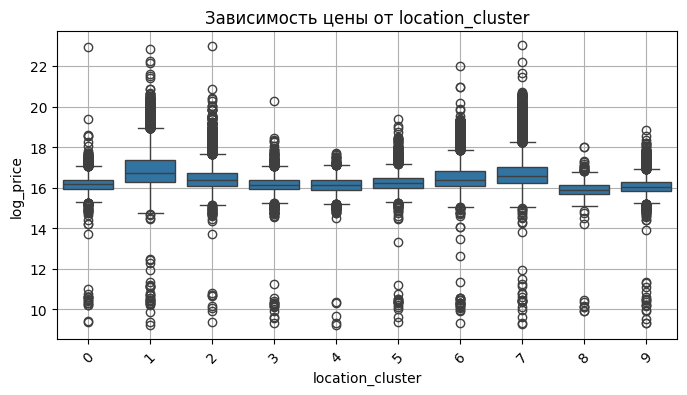

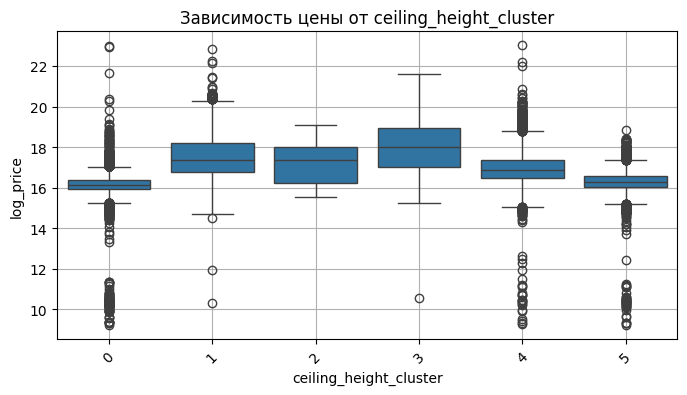

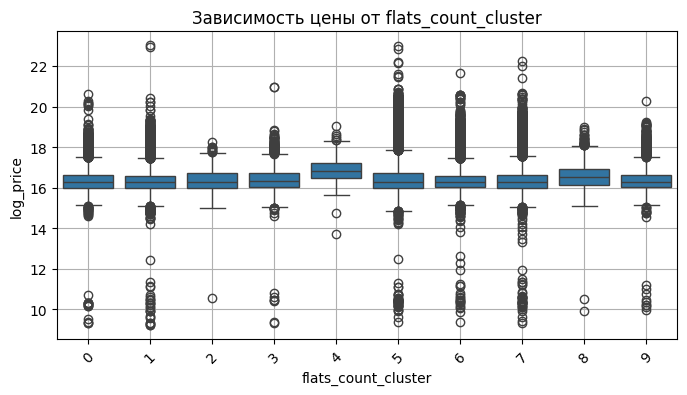

In [19]:
# 5) Исследование категориальных переменных
categorical = [
    'is_apartment', 'has_elevator', 'building_type_int',
    'build_type_floors', 'location_cluster', 'ceiling_height_cluster', 'flats_count_cluster'
]

for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='log_price', data=df)
    plt.title(f'Зависимость цены от {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig(os.path.join(ASSETS_DIR, f'Categorial_features_{col}'))


In [ ]:
# 1 - Зависимость цены (log_price) от is_apartment
# Две категории: обычная квартира (0) и апартаменты (1).
# Распределения очень похожи, но Медиана у апартаментов чуть выше.
# Цены на апартаменты в среднем на 20–25% ниже, чем на квартиры. 
# При этом их расположение часто бывает более удобным: апарт-комплексы 
# стараются строить в центре или вблизи важных городских объектов. 
# Цена — главный «козырь» апартаментов.
# Разброс цен шире у квартир (могут быть как дорогие высотки, так и недорогие многоэтажки), а
# апартаменты могут быть в обычных домах комфорт-класса
# Однако разница незначительная. Поэтому is_apartment имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с floors_total или
# dist_origin_dest, distance_to_metro_fast (например, если далеко от центра города или метро  — это может быть минус).

# 2 - Зависимость цены (log_price) от has_elevator
# Две категории: без лифта (0) и с лифтом (1).
# Распределения очень похожи, но Медиана у домов с лифтом чуть выше, что ожидаемо.
# Разброс цен шире у домов с лифтом (могут быть как дорогие высотки, так и недорогие многоэтажки).
# Однако разница незначительная. Поэтому has_elevator имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с location_cluster 
# или (например, если этажность > 5 и лифта нет — это может быть минус).

# 3 - Зависимость цены (log_price) от building_type_int
# Распределение цен различается между типами.
# Некоторые типы (например, 0, 1, 2 , 3) имеют высокие медианные значения log_price, что может говорить 
# о более элитных или новых домах. Вывод - признак location_cluster имеет информативность и отражает 
# ценовой уровень района, можно использовать в моделе (через OneHotEncoding).

# 4 - Зависимость цены (log_price) от build_type_floors
# Распределения очень похожи, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому build_type_floors имеет слабую предсказательную силу.

# 5 - Зависимость цены (log_price) от location_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 6, 7) имеют высокие медианные значения log_price, что может говорить 
# о более престижных или центральных районах.
# Другие кластеры (8, 3, 4) — с пониженными значениями, возможно, окраины.
# Вывод - признак location_cluster имеет информативность и отражает ценовой уровень района, можно использовать 
# в моделе (через OneHotEncoding).

# 6 - Зависимость цены (log_price) от ceiling_height_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 2, 3) имеют высокие медианные значения log_price, но практически все
# распределение цент приходится на кластеры 0, 4, 5 что может говорить 
# о более престижных домах потолки выше, так класеты 1,2,3 - потолки выше 3.1 метра.
# Вывод - признак ceiling_height_cluster имеет информативность и отражает ценовой уровень квартиры, можно использовать 
# в моделе (через OneHotEncoding).

# 7 - Зависимость цены (log_price) от flats_count_cluster
# Распределения в основном в кластерах 1,2,5,6,7, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому flats_count_cluster имеет слабую предсказательную силу.
# Можно использовать как вспомогательный категориальный признак в сочетании например с building_type_int или build_type_floors

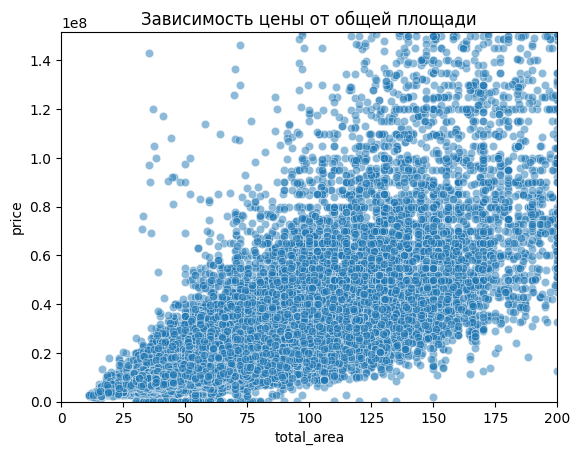

In [13]:
# 6) Зависимость цены от площади

sns.scatterplot(x='total_area', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['price'].quantile(0.99))

plt.savefig(os.path.join(ASSETS_DIR, 'Price_dependence_total_area'))

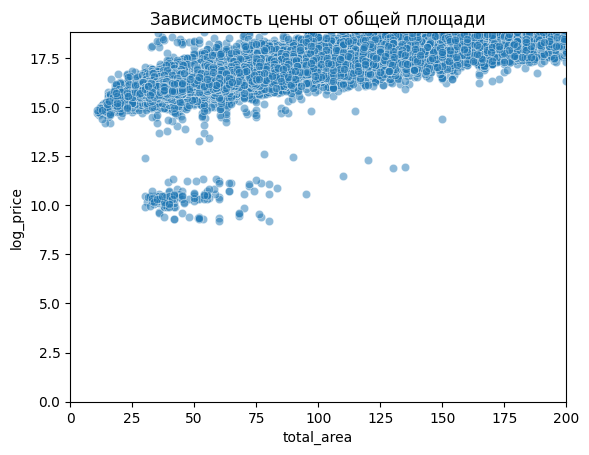

In [ ]:
# 6.1) Зависимость цены от площади

sns.scatterplot(x='total_area', y='log_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['log_price'].quantile(0.99))

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_total_area'))

In [ ]:
# поведение ожидаемо - чем больше плолщадь, тем выше цена. На разброс влияют
# по видимому удаленность от центра города и метро, класс здания

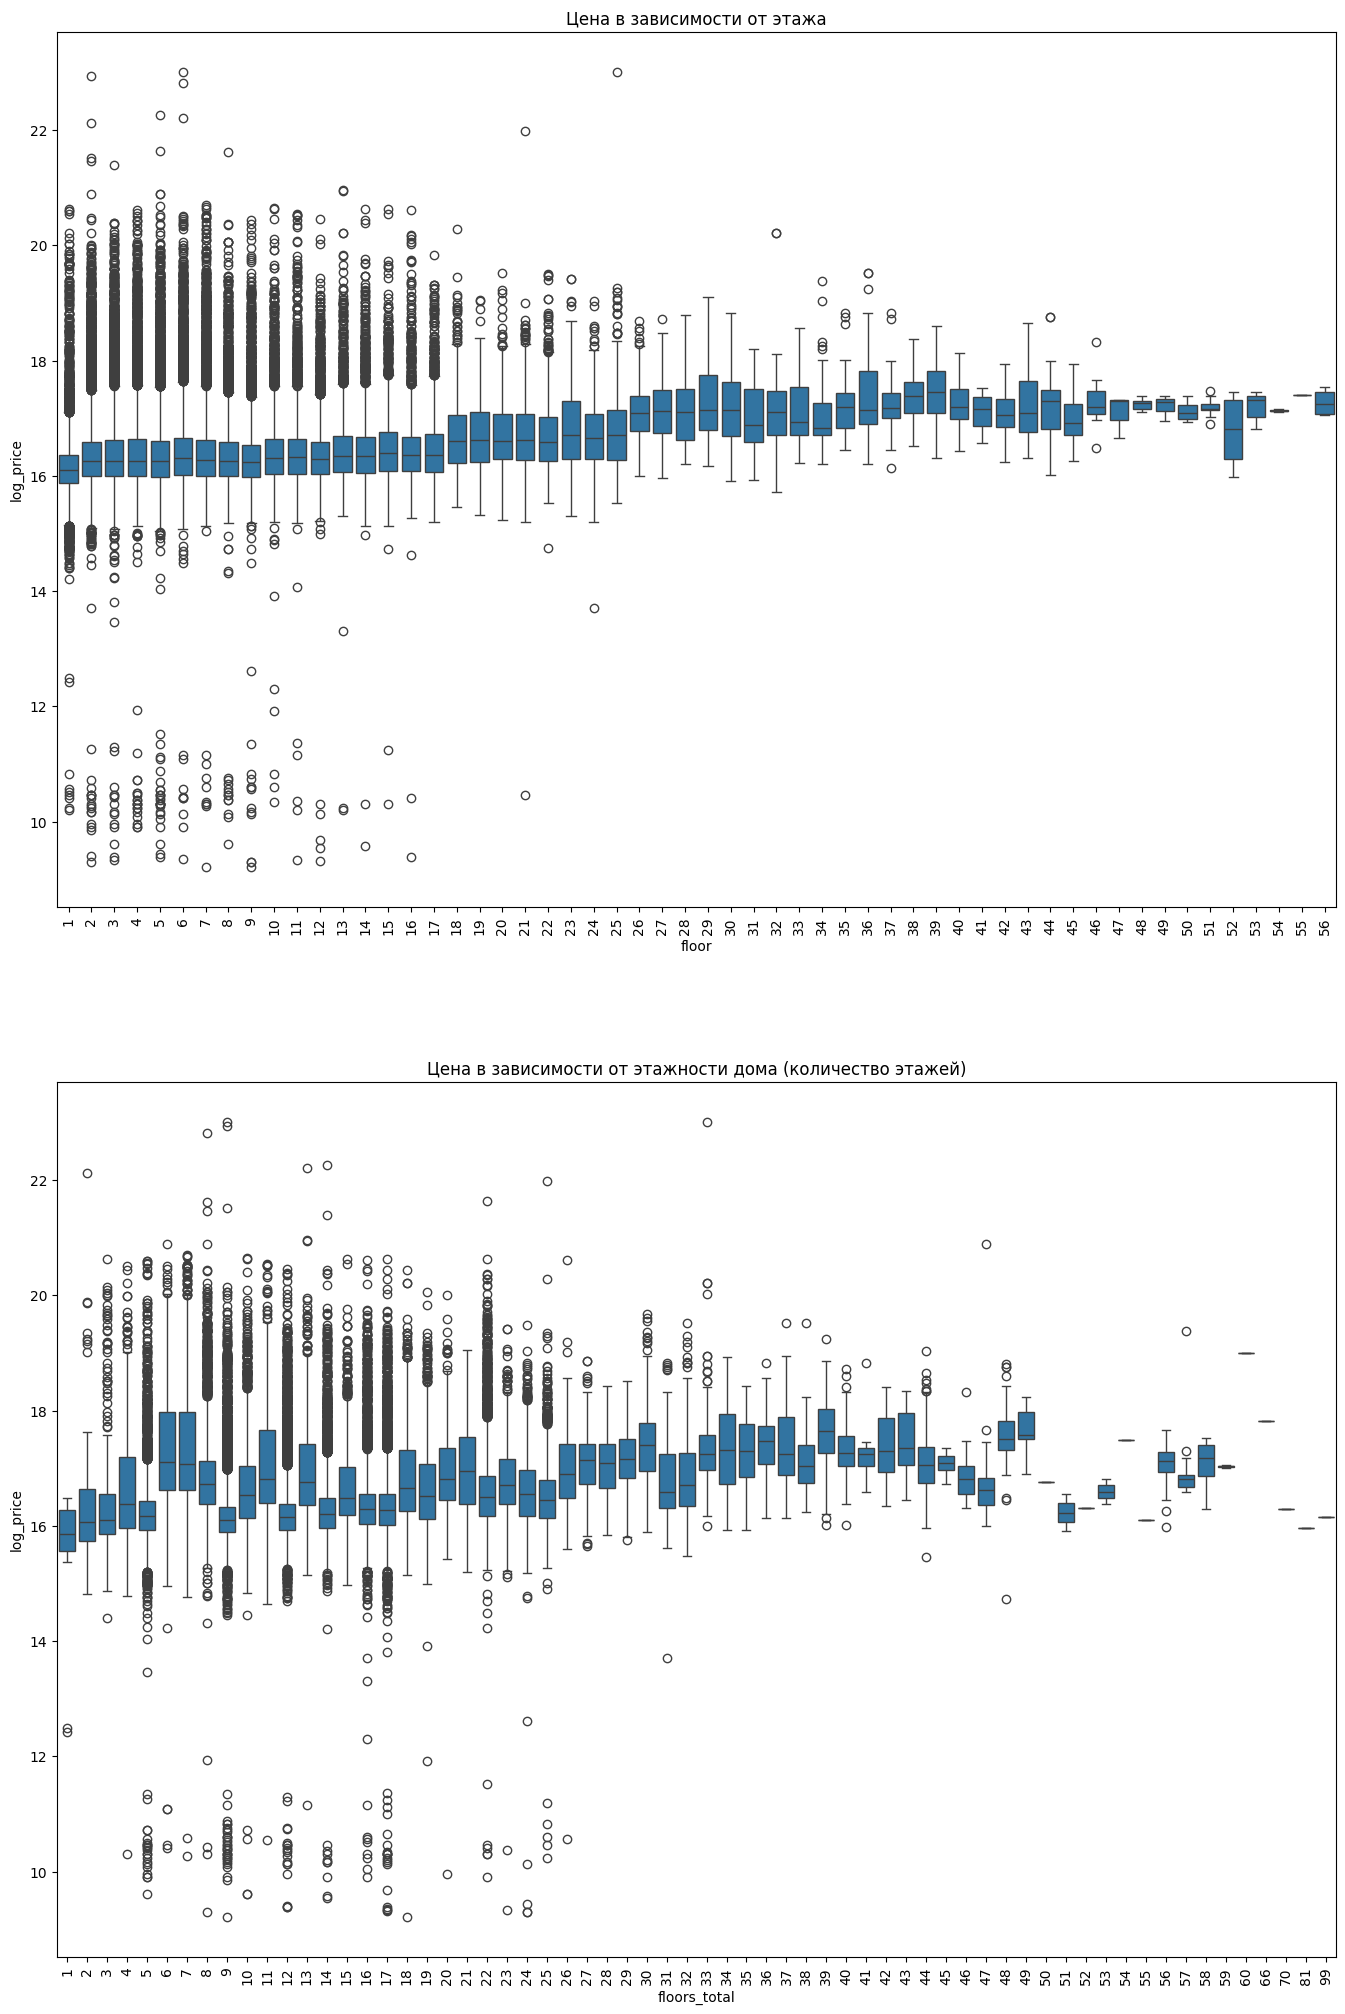

In [31]:
# 7. Этаж и этажность
fig, axs = plt.subplots(2, 1)
#fig.tight_layout(pad=1.2)
fig.set_size_inches(16.5, 25, forward=True) 

sns.boxplot(x='floor', y='log_price', data=df, ax=axs[0])
axs[0].set_title('Цена в зависимости от этажа')
axs[0].tick_params(axis='x', labelrotation=90)

sns.boxplot(x='floors_total', y='log_price', data=df, ax=axs[1])
axs[1].set_title('Цена в зависимости от этажности дома (количество этажей)')
axs[1].tick_params(axis='x', labelrotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_floor_and_floors_total'))

In [17]:
# Вывод: 1) этаж в доме - Чем выше этаж тем выше цена, но зависимость слабая - медиана практически одинаковая.
# до 5-6 этажа цена чуть растет (возможно выше тише, лучше вид), до 17 плато или чуть падение, возможно старые высотки
# Дальше рост до 17 этажа - возможно новые дома или престижный район. После 26 этажа взлеты и паднения в виде 
# синусоиды. Нужно еще посмотреть на распределения для floor_ratio.

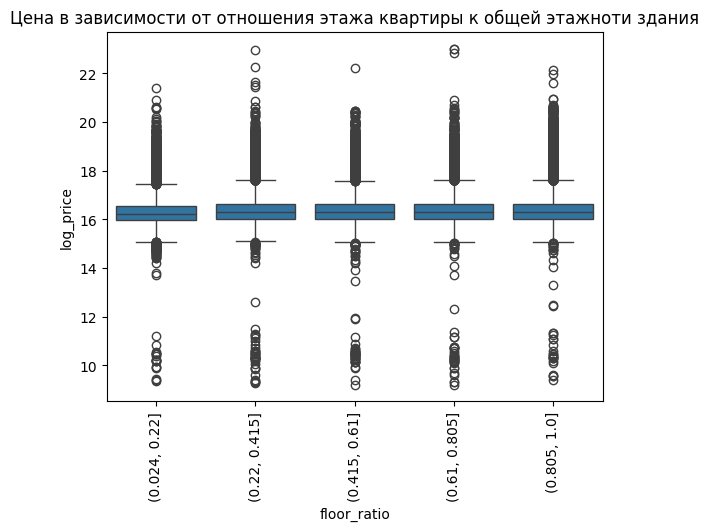

In [20]:
sns.boxplot(x=pd.cut(df['floor_ratio'], bins=5), y='log_price', data=df)
plt.title('Цена в зависимости от отношения этажа квартиры к общей этажноти здания')
plt.xticks(rotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_floor_ratio'))

In [ ]:
# Вывод: Медиана практически одинакова, вероятно самые низкие и самые высокие floor_ratio
# т.е. самые низкие и самые высокие этажи) не дают существенный минус в цене, т.е. нет
# явного предпочтения средних этажей (20-70% высоты).

In [5]:
# Выводы/гипотезы: 
#  floor - слабоположительное влияние - средние этажи дороже (не факт)
#  floors_total - слабоположительное влияние - новые высотки=выше цена => очень вероятно
#  floor_ratio - слабоотрицательное - первый/последний этаж цена ниже (не факт)

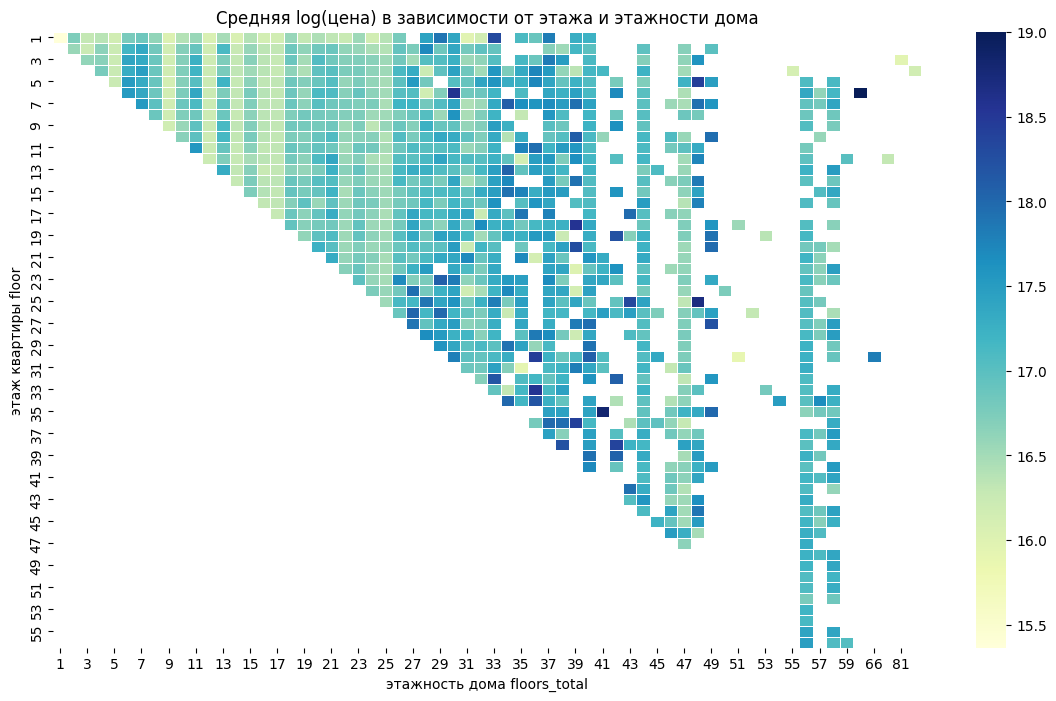

In [10]:
# построим тепловую карту floor x floors_total->средняя log_price

pivot = df.pivot_table(
    values='log_price',
    index='floor',
    columns='floors_total',
    aggfunc='mean'
)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot,
    annot=False,
    fmt='.1f',
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title('Средняя log(цена) в зависимости от этажа и этажности дома')
plt.xlabel('этажность дома floors_total')
plt.ylabel('этаж квартиры floor')

plt.savefig(os.path.join(ASSETS_DIR, 'HeatMap_Log_Price_dependence_floor_Floors_total'))

In [7]:
# заметно, что дорогие квартиры чаше в высоких этажах 
# Гипотеза1: вероятно в новых домах, так же вероятно 1-й этаж и низкие
# этажи в многоэтажках чато дешевле
# Гипотеза2: вероятно крайние этажи в старых домах чаще всего самые дешевые

In [8]:
# поэкспериментируем с признаками, сгенерируем 2 новых на основе этажа и этажности
# - относительный этаж уже есть
# - группировка по этажу
df['floor_group'] = pd.cut(df['floor'], bins=[0, 1, 3, 7, 12, 100],
                           labels=['1-й', 'низкий', 'средний', 'высокий', 'очень высокий'])
df[['floor','floor_group']]

,floor,floor_group
0,9,высокий
1,7,средний
2,9,высокий
3,1,1-й
4,3,низкий
...,...,...
123932,16,очень высокий
123933,5,средний
123934,7,средний
123935,15,очень высокий


In [9]:
# - группировка по этажности дома (изменим принцип ранее созданной группировки -  build_type_floors)
df['build_height_group'] = pd.cut(df['floors_total'], bins=[0, 4, 9, 17, 100],
                                  labels=['малоэтажка', 'среднеэтажка', 'высотка', 'небоскреб'])
df[['floors_total', 'build_type_floors', 'build_height_group']]

,floors_total,build_type_floors,build_height_group
0,12,high_rise,высотка
1,10,high_rise,высотка
2,10,high_rise,высотка
3,17,high_rise,высотка
4,9,multy_story,среднеэтажка
...,...,...,...
123932,25,high_rise,небоскреб
123933,5,mid_rise,среднеэтажка
123934,9,multy_story,среднеэтажка
123935,25,high_rise,небоскреб


In [10]:
# определим флаг "нежелательных" этажей
df['bad_floor_flag'] = ((df['floor'] == 1) | (df['floor'] == df['floors_total'])).astype(int)
df[['floor', 'floors_total', 'bad_floor_flag']]

,floor,floors_total,bad_floor_flag
0,9,12,0
1,7,10,0
2,9,10,0
3,1,17,1
4,3,9,0
...,...,...,...
123932,16,25,0
123933,5,5,1
123934,7,9,0
123935,15,25,0


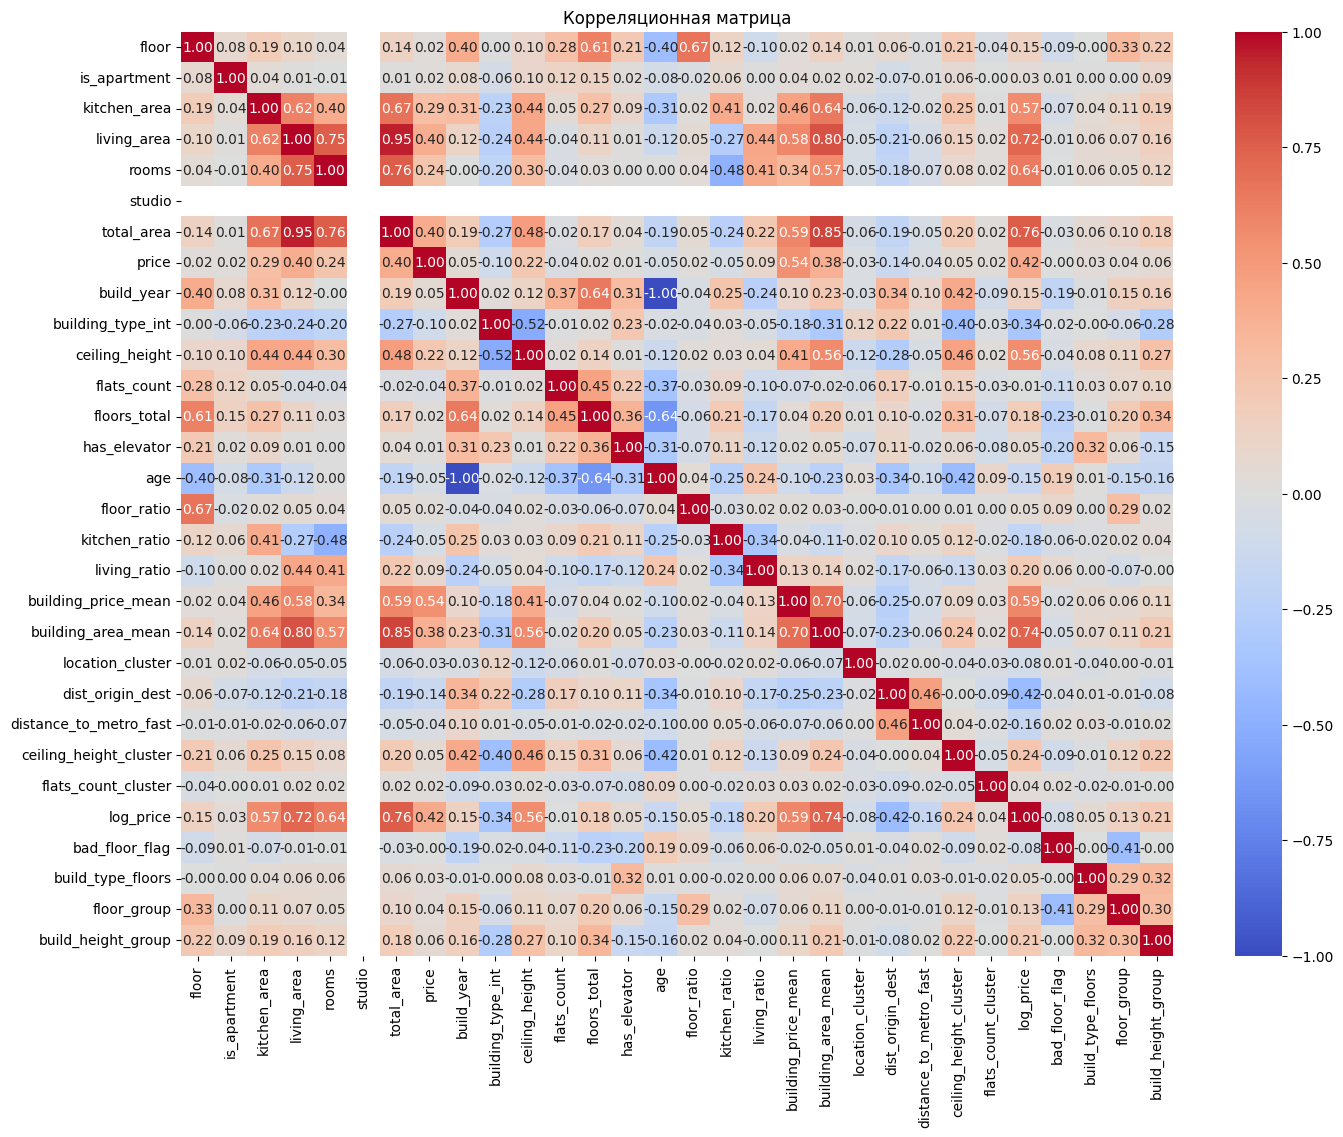

In [11]:
# 4) Проведем повторный корреляционный анализ

from sklearn.compose import ColumnTransformer
from category_encoders import CatBoostEncoder

non_binary_cat_cols = df.select_dtypes(['category','object']).columns
preprocessor = ColumnTransformer(
    [
        ('no_cat', 'passthrough', df.select_dtypes(['int', 'float']).columns),
        ('cat', CatBoostEncoder(return_df=False), non_binary_cat_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

df_transf_CB = pd.DataFrame(preprocessor.fit_transform(df, df['price']), columns=preprocessor.get_feature_names_out())
numeric_only = df.select_dtypes(['int', 'float']).columns
plt.figure(figsize=(16, 12))
corr = df_transf_CB.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
# Особое внимание — на корреляции с price или log_price.

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Correlation_matrix_second_version'))

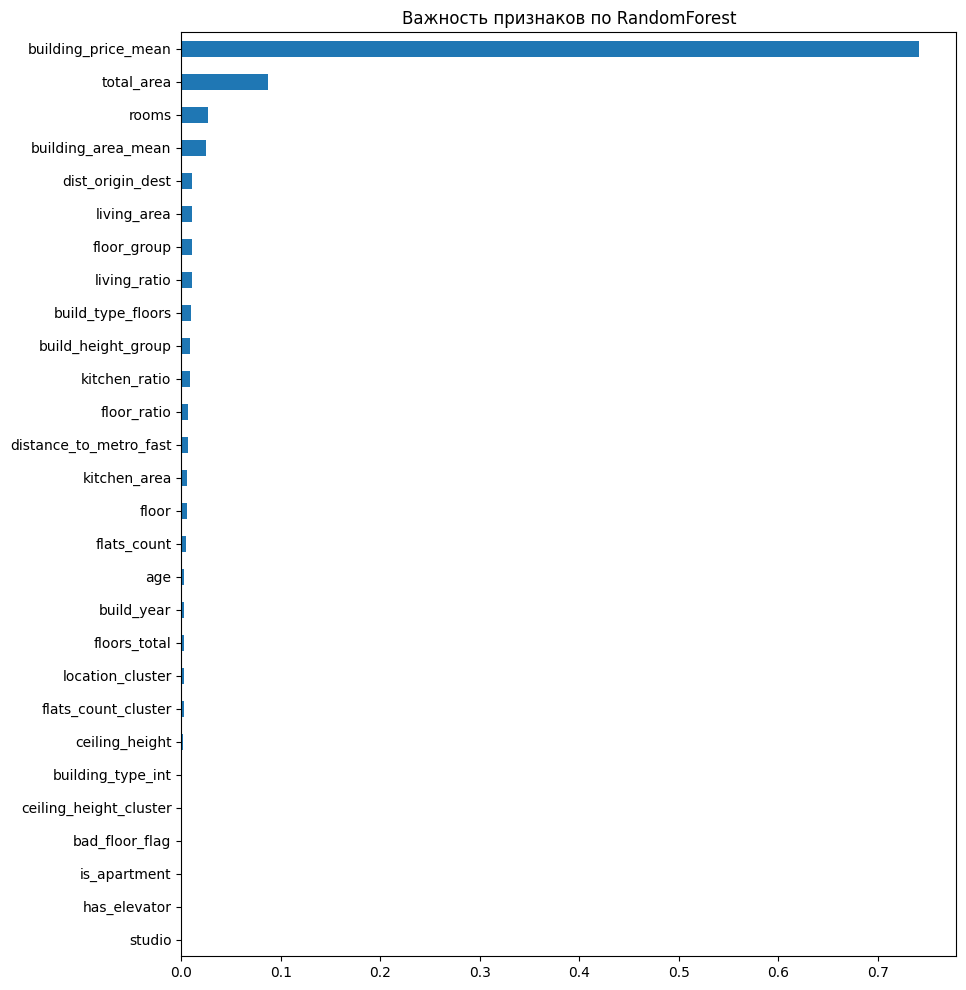

In [12]:
# Посмотрим значимость признаков с новыми

# обучим простую модель RandomForest
from sklearn.ensemble import RandomForestRegressor

features = df_transf_CB.drop(columns=['price', 'log_price'])
target = df_transf_CB['log_price']

# выбираем только числовые признаки
X = features.select_dtypes(include=[np.number]).fillna(0)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, target)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,12))
plt.title('Важность признаков по RandomForest')

plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest'))

In [13]:
model

RandomForestRegressor(random_state=42)

In [14]:
# Выводы/гипотезы: 
#  floor_group - слабоположительное влияние, примерно такое же как у living_area - вероятно оствлю в модели
#  build_type_floors и build_height_group - слабоположительное влияние, примерно одинаковые, но в корреляционном анализе
#                                           влияние build_height_group сильнее 0.21 к 0.05, поэтому в модели оставлю его 
#  bad_floor_flag - слабоотрицательное влияние, но по RandomForest не важная фича, возможно уберу.

In [16]:
# SHAP для оценки влияния bad_floor_flag, build_type_floors, floor_group, build_height_group
import shap

# используем ранее обучнную модель RandomForest
explainer = shap.Explainer(model.predict, X.head(1000))
shap_values = explainer(X.head(1000))

PermutationExplainer explainer: 1001it [11:56,  1.38it/s]                          


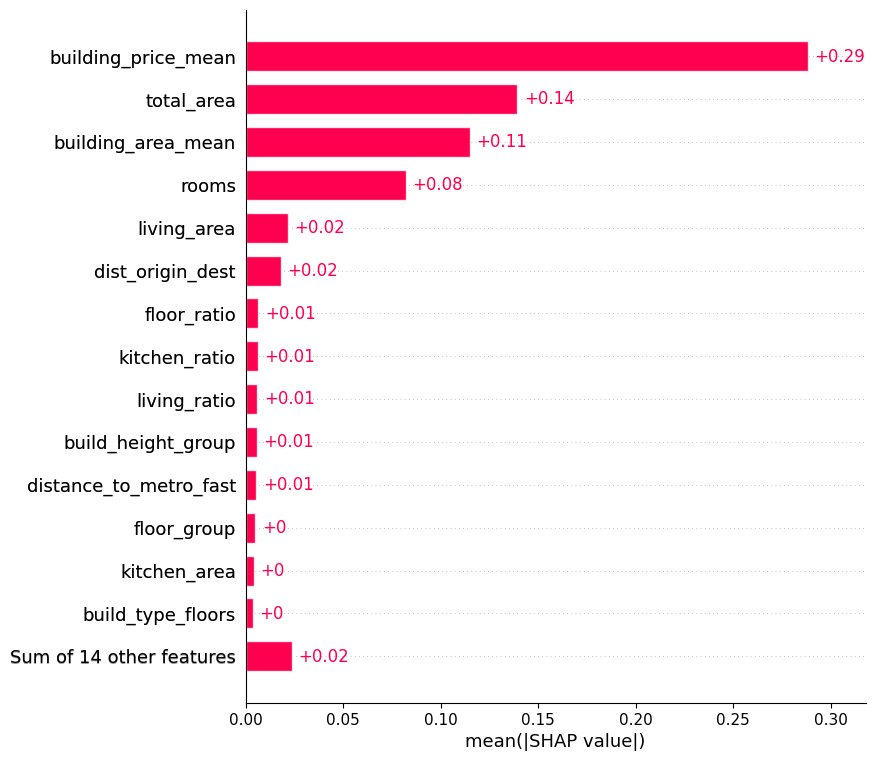

<Figure size 640x480 with 0 Axes>

In [17]:
shap.plots.bar(shap_values, max_display=15)
plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest_2'))

In [ ]:
# по оценке SHAP bad_floor_flag, build_type_floors, floor_group, build_height_group не оказывают никакого 
# влияния на предсказания.

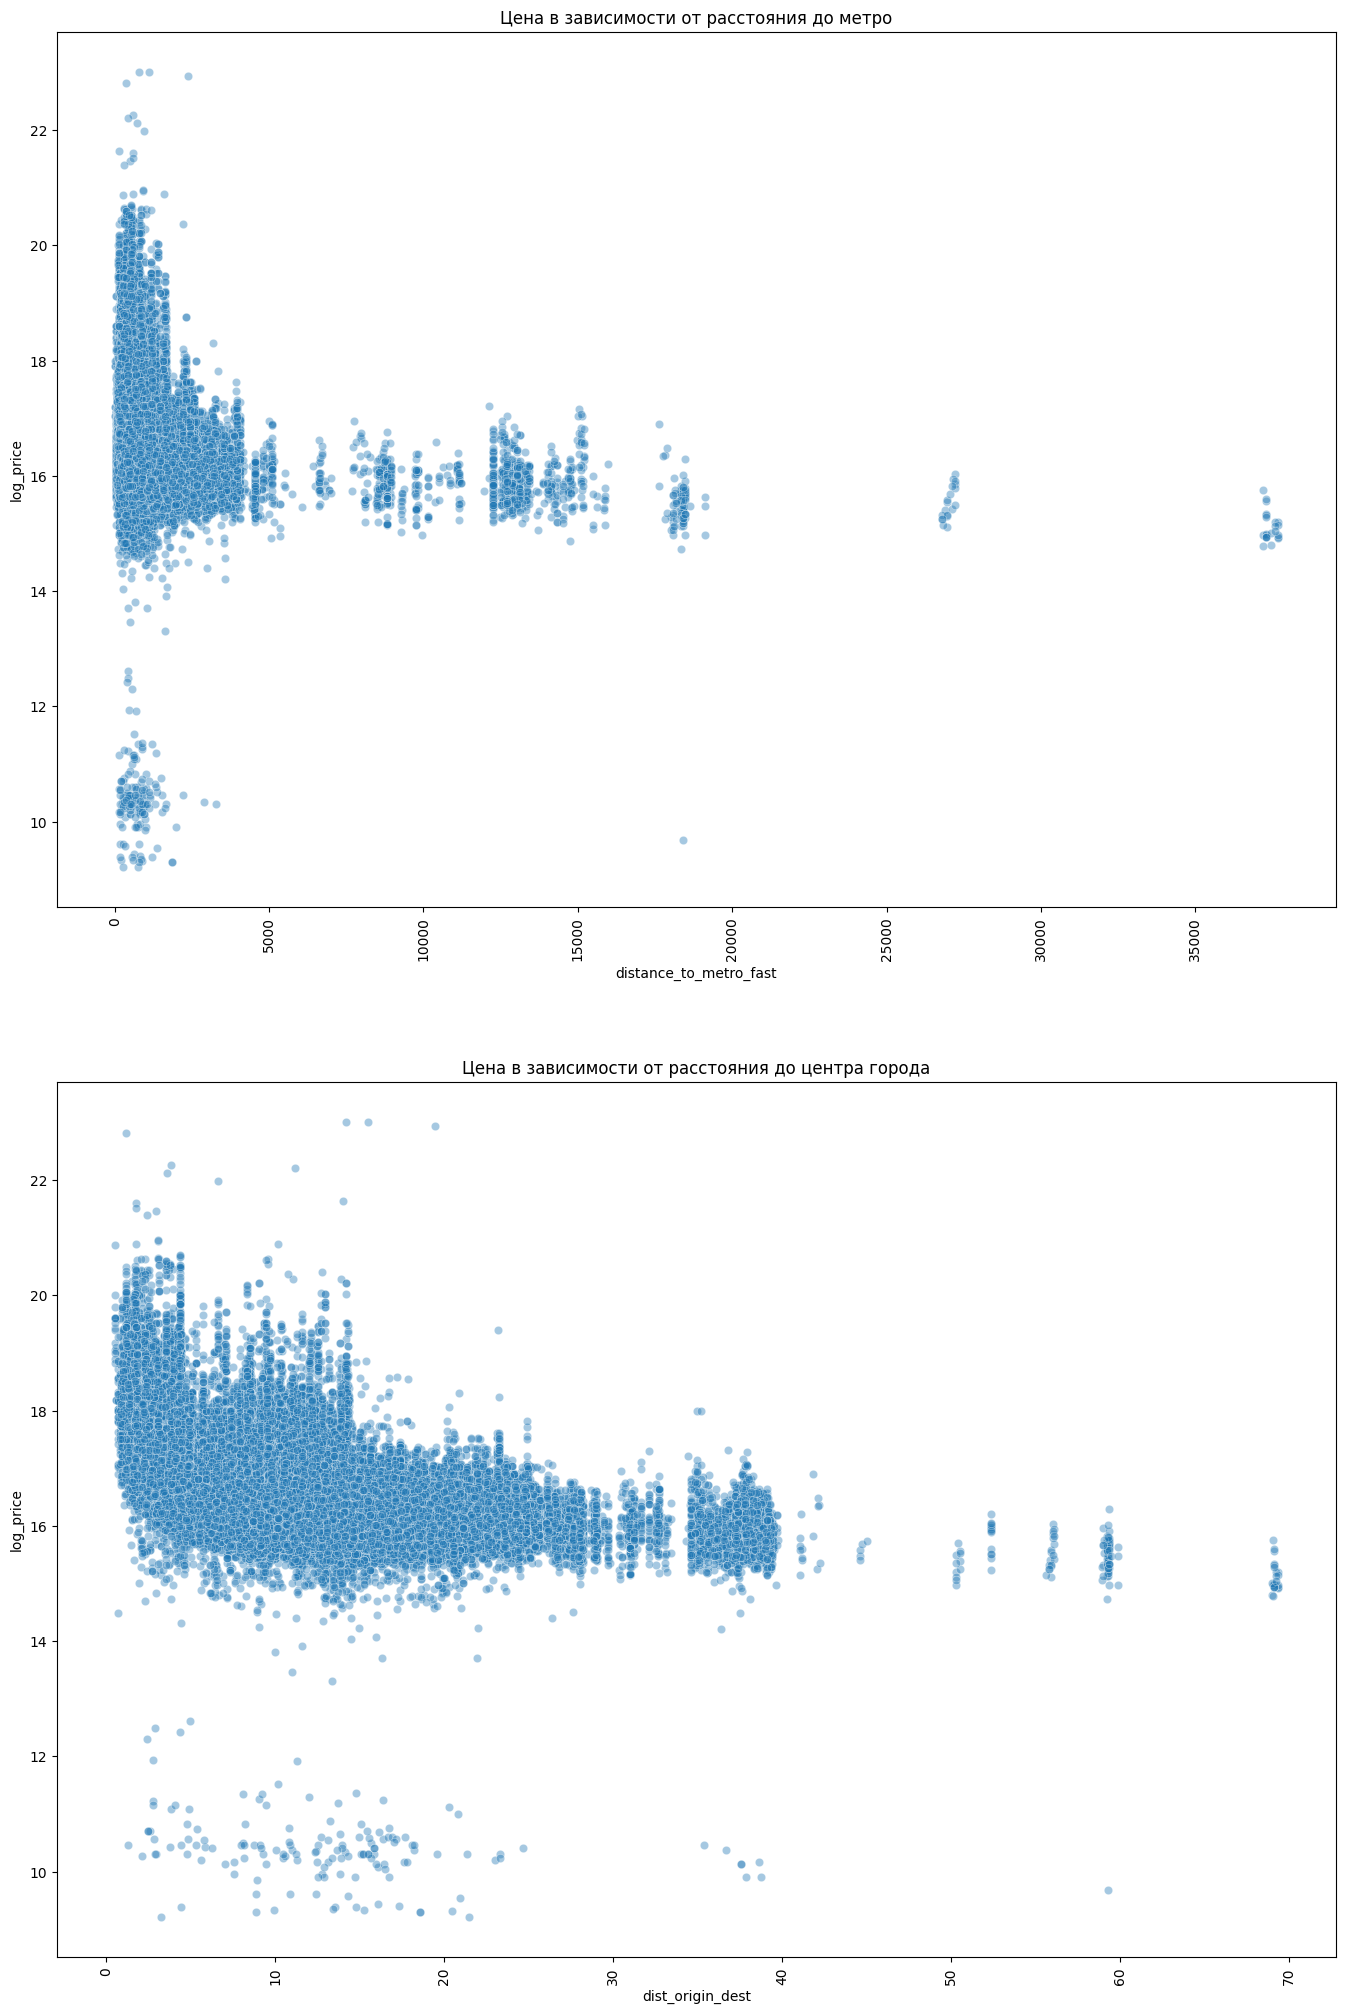

In [14]:
# 8. Удаленность от центра и метро

fig, axs = plt.subplots(2, 1)
#fig.tight_layout(pad=1.2)
fig.set_size_inches(16.5, 25, forward=True) 

x = 'distance_to_metro_fast'
y = 'log_price'
sns.scatterplot(x=x, y=y, data=df, alpha=0.4, ax=axs[0])
axs[0].set_title('Цена в зависимости от расстояния до метро')
axs[0].tick_params(axis='x', labelrotation=90)


x = 'dist_origin_dest'
sns.scatterplot(x=x, y=y, data=df, alpha=0.4, ax=axs[1])
axs[1].set_title('Цена в зависимости от расстояния до центра города')
axs[1].tick_params(axis='x', labelrotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_to_metro_center_city'))

In [ ]:
# Ожидаемо - цена выже чем блице к метро или к центру города

In [31]:
# 9. Проверка выбросов

from scipy.stats import zscore

z_scores = np.abs(zscore(df[numeric_features]))
outliers = (z_scores > 3).sum(axis=0)
outliers[outliers>0]

total_area                2248
kitchen_area              2402
living_area               2092
floor                     1465
floors_total              1839
ceiling_height            1334
age                       1059
kitchen_ratio             1867
living_ratio               379
building_price_mean       1657
building_area_mean        2689
dist_origin_dest          2919
distance_to_metro_fast     996
dtype: int64

In [ ]:
# Это достаточно много — скорее всего:
# - Данные имеют асимметрию или длинные хвосты (например, в area).
# - z-score может быть неоптимален для таких распределений — он чувствителен к ненормальности.

# Варианты действий с выбросами:
# 1: Ничего не делать, модели вроде CatBoost, RandomForest, Tree-based не боятся выбросов. Можно оставить как есть.
# 2: Удалить выбросы
# 3: Ограничить значения вручную (например при помощи clip)
# 4: Использовать более устойчивые методы обнаружения выбросов, например IQR (межквартильный размах)

In [ ]:
# Обрезаем total_area по 1 и 99 перцентилям
low, high = df['total_area'].quantile([0.01, 0.99])
df['total_area_clipped'] = df['total_area'].clip(lower=low, upper=high)

In [43]:
df[['total_area', 'total_area_clipped']].min()

total_area            11.0
total_area_clipped    29.0
dtype: float64

In [44]:
df[['total_area', 'total_area_clipped']].max()

total_area            920.0
total_area_clipped    220.0
dtype: float64

In [45]:
# Обрезаем kitchen_area по 1 и 99 перцентилям
low, high = df['kitchen_area'].quantile([0.01, 0.99])
df['kitchen_area_clipped'] = df['kitchen_area'].clip(lower=low, upper=high)

In [47]:
df[['kitchen_area', 'kitchen_area_clipped']].min()

kitchen_area            0.1
kitchen_area_clipped    5.0
dtype: float64

In [48]:
df[['kitchen_area', 'kitchen_area_clipped']].max()

kitchen_area            436.299988
kitchen_area_clipped     40.000000
dtype: float64

In [49]:
# Обрезаем Living_area по 1 и 99 перцентилям
low, high = df['living_area'].quantile([0.01, 0.99])
df['living_area_clipped'] = df['living_area'].clip(lower=low, upper=high)

In [50]:
df[['living_area', 'living_area_clipped']].min()

living_area             2.0000
living_area_clipped    14.3372
dtype: float64

In [ ]:
df[['living_area', 'living_area_clipped']].max()

living_area            836.363636
living_area_clipped    160.000000
dtype: float64

In [52]:
# пересчитаем колонки
df['kitchen_ratio'] = df['kitchen_area_clipped'].div(df['total_area_clipped'], axis=0)
df['living_ratio'] = df['living_area_clipped']/df['total_area_clipped'].values

In [61]:
# переименуем старые и новые колонки
df = df.rename(columns={"living_area": "living_area_old", "kitchen_area": "kitchen_area_old", "total_area": "total_area_old"})
#df.rename(columns={df.columns[6]: 'total_area_old'})
df = df.rename(columns={"living_area_clipped": "living_area", "kitchen_area_clipped": "kitchen_area", "total_area_clipped": "total_area"})

In [74]:
# остальные оставим без изменения

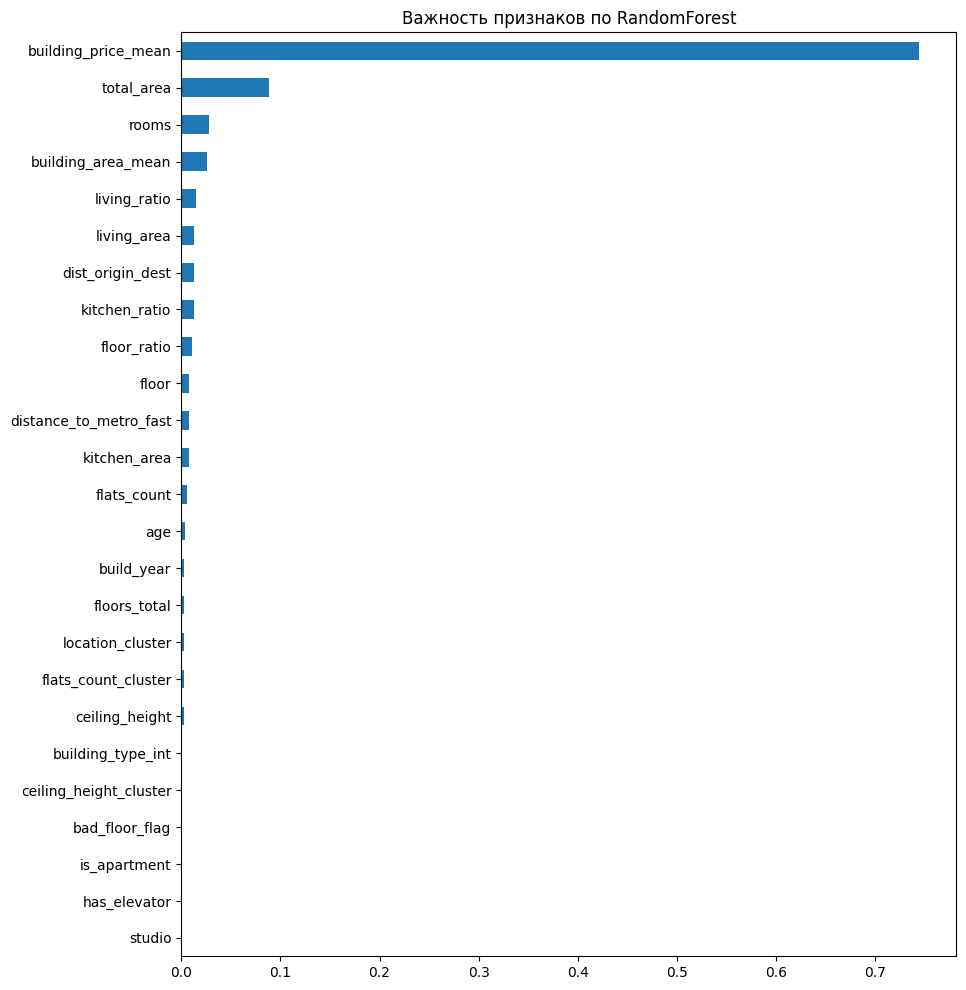

In [79]:
# 10. Посмотрим значимость признаков

# обучим простую модель RandomForest
from sklearn.ensemble import RandomForestRegressor

features = df[df.columns.difference(['living_area_old','kitchen_area_old','total_area_old'])].drop(columns=['price', 'log_price'])
target = df['log_price']

# выбираем только числовые признаки
X = features.select_dtypes(include=[np.number]).fillna(0)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, target)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,12))
plt.title('Важность признаков по RandomForest')

plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest'))

In [ ]:
# Вывод: Наиболее знчимые по версии RandomForest: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area

In [80]:
# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/transform_data_EDA.csv', 'wb') as fd:
    df.to_csv('../data/transform_data_EDA.csv', index=None)

In [81]:
df.head(5)

,floor,is_apartment,kitchen_area_old,living_area_old,rooms,studio,total_area_old,price,build_year,building_type_int,...,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster,log_price,floor_group,build_height_group,bad_floor_flag,total_area,kitchen_area,living_area
0,9,0,9.9,19.900000,1,0,35.099998,9500000,1965,6,...,732.967724,0,5,16.066802,высокий,высотка,0,35.099998,9.9,19.900000
1,7,0,16.6,26.400000,1,0,43.000000,13500000,2001,2,...,525.649516,4,7,16.418200,средний,высотка,0,43.000000,16.6,26.400000
2,9,0,9.0,32.000000,2,0,56.000000,13500000,2000,4,...,538.689763,5,5,16.418200,высокий,высотка,0,56.000000,9.0,32.000000
3,1,0,10.1,43.099998,3,0,76.000000,20000000,2002,4,...,815.506000,0,8,16.811243,1-й,высотка,1,76.000000,10.1,43.099998
4,3,0,3.0,14.000000,1,0,24.000000,5200000,1971,1,...,1442.654973,0,1,15.464169,низкий,среднеэтажка,0,29.000000,5.0,14.337200


In [86]:
# 11. Проверка значимости категориальных признакова

from scipy.stats import f_oneway, kruskal

categorical_features = ['is_apartment', 
                        'has_elevator', 
                        'building_type_int', 
                        'build_type_floors', 
                        'location_cluster', 
                        'ceiling_height_cluster', 
                        'flats_count_cluster',
                        'build_height_group',
                        'floor_group']
results = {}

for feature in categorical_features:
    groups = [group['log_price'].values for _, group in df.groupby(feature)]
    
    # ANOVA
    anova_p = f_oneway(*groups).pvalue
    
    # Kruskal-Wallis
    kruskal_p = kruskal(*groups).pvalue
    
    results[feature] = {
        'ANOVA p-value': anova_p,
        'Kruskal-Wallis p-value': kruskal_p
    }

pd.DataFrame(results).T

,ANOVA p-value,Kruskal-Wallis p-value
is_apartment,7.351010e-31,7.357103e-59
has_elevator,6.408627e-70,1.525629e-135
building_type_int,0.000000e+00,0.000000e+00
build_type_floors,1.641469e-252,0.000000e+00
location_cluster,0.000000e+00,0.000000e+00
ceiling_height_cluster,0.000000e+00,0.000000e+00
flats_count_cluster,6.186196e-320,1.506695e-227
build_height_group,0.000000e+00,0.000000e+00
floor_group,0.000000e+00,0.000000e+00


In [87]:
# (Для запоминания и более детельного изучения) Интерпретация:
# - p-value < 0.05 — статистически значимое различие между группами.
# - ANOVA — предполагает нормальность (более чувствителен к выбросам).
# - Kruskal-Wallis — непараметрический аналог, устойчив к выбросам и ненормальности.

# Вывод: Получились очень маленькие p-value для всех категориальных признаков — как по ANOVA, 
# так и по Kruskal-Wallis следовательно это значит что высокая статистическая значимость этих признаков.

In [88]:
# проверка на выбросы
num_cols = df.select_dtypes(['float', 'int']).columns#.drop({'latitude', 'longitude'})

In [89]:
threshold = 1.5
potential_outliers = pd.DataFrame()

In [90]:
print('min: ',df['price'].min(), ' max:', df['price'].max())

min:  10000  max: 9873737728


In [91]:
for col in num_cols:
    Q1 = df[col].min() 
    Q3 = df[col].max() 
    IQR = Q3 - Q1 
    margin =threshold * IQR 
    lower = Q1 - margin
    upper = Q3 + margin
    potential_outliers[col] = ~df[col].between(lower, upper)

In [92]:
potential_outliers.value_counts()

floor  is_apartment  kitchen_area_old  living_area_old  rooms  studio  total_area_old  price  build_year  building_type_int  ceiling_height  flats_count  floors_total  has_elevator  age    floor_ratio  kitchen_ratio  living_ratio  building_price_mean  building_area_mean  location_cluster  dist_origin_dest  distance_to_metro_fast  ceiling_height_cluster  flats_count_cluster  log_price  bad_floor_flag  total_area  kitchen_area  living_area
False  False         False             False            False  False   False           False  False       False              False           False        False         False         False  False        False          False         False                False               False             False             False                   False                   False                False      False           False       False         False          123937
Name: count, dtype: int64

In [93]:
Q_mean = df['ceiling_height'].mean()
Q_mean

2.7502206428564797

In [94]:
margin =2 * Q_mean
margin

5.500441285712959

In [95]:
lower = Q_mean - margin
upper = Q_mean + margin
potential_outliers = ~df['ceiling_height'].between(lower, upper)
potential_outliers.unique()

array([False])

In [96]:
df.query('ceiling_height>@upper', engine='python')

,floor,is_apartment,kitchen_area_old,living_area_old,rooms,studio,total_area_old,price,build_year,building_type_int,...,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster,log_price,floor_group,build_height_group,bad_floor_flag,total_area,kitchen_area,living_area


In [ ]:
# сделано
# df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] = df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] /10

In [97]:
df['ceiling_height'].max()

8.0

In [98]:
# 2.5 Выводы после EDA

In [ ]:
# Зависимость цены (log_price) от is_apartment
# - is_apartment имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с floors_total или
# dist_origin_dest, distance_to_metro_fast (например, если далеко от центра города или метро  — это может быть минус).

# Зависимость цены (log_price) от has_elevator
# - has_elevator имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с location_cluster 
# или (например, если этажность > 5 и лифта нет — это может быть минус).

# Зависимость цены (log_price) от building_type_int
# - building_type_int имеет информативность и отражает 
# ценовой уровень района, можно использовать в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от build_type_floors
# - build_type_floors имеет слабую предсказательную силу.

# Зависимость цены (log_price) от location_cluster
# - location_cluster имеет информативность и отражает ценовой уровень района, можно использовать 
# в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от ceiling_height_cluster
# - ceiling_height_cluster имеет информативность и отражает ценовой уровень квартиры, можно использовать 
# в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от flats_count_cluster
# - floor_group - слабоположительное влияние, примерно такое же как у living_area - вероятно оставлю в модели
# - build_type_floors и build_height_group - слабоположительное влияние, примерно одинаковые, но в корреляционном анализе
#                                           влияние build_height_group сильнее 0.21 к 0.05, поэтому в модели оставлю его 
# - bad_floor_flag - слабоотрицательное влияние, но по RandomForest не важная фича, возможно уберу на последующих этапах.

# Наиболее значимые по версии RandomForest: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area

# Данные имеют асимметрию или длинные хвосты (например, в area).
# Варианты поступил так:
# Ограничил значения в некоторых столбцах (..._area) вручную при помощи clip, остальные оставил без изменения. 
# одели вроде CatBoost, RandomForest, Tree-based не боятся выбросов. Можно оставить как есть. В ручную 
# откорректировал мах высоту потолков (было 27 - стало 8 - если есть 2х уровневые квартиры)


In [ ]:
# Итого: 
# Для сравнения буду использовать 3 набора признаков:

# 1. полный набор признаков (31)

# 2. 
# - числовые: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast+
# - категории: is_apartment, has_elevator, building_type_int, build_type_floors, location_cluster, 
# ceiling_height_cluster, flats_count_cluster, build_height_group, floor_group (21)

# 3. 
# - отобрал по карте корреляционного анализа: kitchen_area, living_area, rooms, total_area, ceiling_height
# building_price_mean, building_area_mean, ceiling_height_cluster, build_height_group, living_ratio (положительное влияние),
# building_type_int, dist_origin_dest, distance_to_metro_fast, age (отрицательное влияние) (14)

In [1]:
# ===========================================================
# %% -- Обучение модели на выбранных наборах фичей
# ===========================================================

# импорт библиотек
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
import numpy as np
import os
import joblib
import pandas as pd
import mlflow
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder, 
    OrdinalEncoder
    )
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from dotenv import load_dotenv

In [187]:
# 1 загрузка модели
if os.path.exists('../models/fitted_model_CBR.pkl'):
    with open('../models/fitted_model_CBR.pkl', 'rb') as fd:
        model_first_set = joblib.load(fd)

In [305]:
# 2. загрузка датасета 

pd.options.display.max_columns = 100
pd.options.display.max_rows = 64

if os.path.exists('../data/transform_data_EDA.csv'):
    df = pd.read_csv('../data/transform_data_EDA.csv')
    
df.head(5)

,floor,is_apartment,kitchen_area_old,living_area_old,rooms,studio,total_area_old,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors,age,floor_ratio,kitchen_ratio,living_ratio,building_price_mean,building_area_mean,location_cluster,dist_origin_dest,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster,log_price,floor_group,build_height_group,bad_floor_flag,total_area,kitchen_area,living_area
0,9,0,9.9,19.900000,1,0,35.099998,9500000,1965,6,2.64,84,12,1,high_rise,60,0.750000,0.282051,0.566952,9.100000e+06,41.049999,9,11.107508,732.967724,0,5,16.066802,высокий,высотка,0,35.099998,9.9,19.900000
1,7,0,16.6,26.400000,1,0,43.000000,13500000,2001,2,3.00,97,10,1,high_rise,24,0.700000,0.386047,0.613953,1.873333e+07,55.966667,1,4.772297,525.649516,4,7,16.418200,средний,высотка,0,43.000000,16.6,26.400000
2,9,0,9.0,32.000000,2,0,56.000000,13500000,2000,4,2.70,80,10,1,high_rise,25,0.900000,0.160714,0.571429,1.518333e+07,60.533333,9,9.277185,538.689763,5,5,16.418200,высокий,высотка,0,56.000000,9.0,32.000000
3,1,0,10.1,43.099998,3,0,76.000000,20000000,2002,4,2.64,771,17,1,high_rise,23,0.058824,0.132895,0.567105,1.477082e+07,50.200000,7,9.359522,815.506000,0,8,16.811243,1-й,высотка,1,76.000000,10.1,43.099998
4,3,0,3.0,14.000000,1,0,24.000000,5200000,1971,1,2.60,208,9,1,multy_story,54,0.333333,0.172414,0.494386,7.580000e+06,28.218750,1,8.534197,1442.654973,0,1,15.464169,низкий,среднеэтажка,0,29.000000,5.0,14.337200


In [306]:
y = df['log_price']
df.drop(columns=['log_price', 'price'], inplace=True)
X = df

cat_features = df.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = df.nunique() == 2
potential_binary_features.studio = True

binary_cat_features = df[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = df.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['location_cluster','ceiling_height_cluster','flats_count_cluster'], inplace=True) 


In [307]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1]+ np.array(['location_cluster','ceiling_height_cluster','flats_count_cluster']).shape[0]

31

In [308]:
model_first_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [309]:
preprocessor = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['location_cluster','ceiling_height_cluster','flats_count_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [310]:
#cat_feature_indices = list(range(len(binary_cat_features.columns) + len(other_cat_features.columns) + 4))

pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', model_first_set)
    ]
)

In [311]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment', 'studio',
                                                   'has_elevator',
                                                   'bad_floor_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'floor_group',
                                                   'build_height_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['floo...
                                                   'building_type_int',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'age',
                                                   'floor_ratio',
                                                   'kitchen_ratio',
                                                   'living_ratio',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'total_area', 'kitchen_area',
                                                   'living_area'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a216aa10>)])

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

X_test_first = X_test

In [313]:
# обучим пайплайн
pipeline.fit(X_train, y_train)

0:	learn: 0.6506956	total: 43.5ms	remaining: 43.5s
100:	learn: 0.2681828	total: 3.63s	remaining: 32.3s
200:	learn: 0.2554217	total: 7.15s	remaining: 28.4s
300:	learn: 0.2481859	total: 10.6s	remaining: 24.6s
400:	learn: 0.2421981	total: 14s	remaining: 20.9s
500:	learn: 0.2378666	total: 17.4s	remaining: 17.4s
600:	learn: 0.2342724	total: 20.8s	remaining: 13.8s
700:	learn: 0.2309012	total: 25s	remaining: 10.7s
800:	learn: 0.2279136	total: 28.5s	remaining: 7.08s
900:	learn: 0.2246797	total: 32s	remaining: 3.52s
999:	learn: 0.2219749	total: 35.6s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment', 'studio',
                                                   'has_elevator',
                                                   'bad_floor_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'floor_group',
                                                   'build_height_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['floo...
                                                   'building_type_int',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'age',
                                                   'floor_ratio',
                                                   'kitchen_ratio',
                                                   'living_ratio',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'total_area', 'kitchen_area',
                                                   'living_area'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a216aa10>)])

In [314]:
# получим предсказания для тестовой выборки
y_pred = pipeline.predict(X_test)
y_pred_first = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3532582.7
RMSE ≈ 55956099.8


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [320]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics_1 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_1 = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}


# Средняя абсолютная масштабированная ошибка (MASE):
# Средняя абсолютная масштабированная ошибка (Mean absolute scaled error) — это показатель, который позволяет сравнивать две модели. 
# Если поместить MAE для новой модели в числитель, а MAE для исходной модели в знаменатель, то полученное отношение и будет равно 
# MASE. Если значение MASE меньше 1, то новая модель работает лучше, если MASE равно 1, то модели работают одинаково, а если значение 
# MASE больше 1, то исходная модель работает лучше, чем новая модель. Формула для расчета MASE имеет вид:
# MASE= MAEj/MAEi. MASE симметрична и устойчива к выбросам.

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [321]:
metrics_1

{'MAE': 3532582.674518879,
 'MSE': 3131085108350579.0,
 'RMSE': 55956099.831480205,
 'MSPE': 130.69347644276056,
 'RMSPE': 11.432124756262965,
 'MedAE': 1368294.8747047307,
 'MAPE_proc': 44.36463294789109,
 'SMAPE': 0.4436463294789109,
 'MRE': 44.36463294789109,
 'MSLE': 0.07123176554070118,
 'RMSLE': 0.26689279784344344,
 'R_2': 0.30654099056968676,
 'Adjusted R_2': 0.3063674928957242,
 'WAPE': 0.18151552214192332}

In [322]:
mae_first_set_model = mae
mae_first_set_model

3532582.674518879

In [254]:
# формируем второй сэт признаков
# 2. 
# - числовые: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area +
# - категории: is_apartment, has_elevator, building_type_int, build_type_floors, location_cluster, 
# ceiling_height_cluster, flats_count_cluster, build_height_group, floor_group (21)
X2=df[['building_price_mean', 'total_area', 'rooms', 'building_area_mean', 'living_ratio', 'living_area', 'dist_origin_dest', 'kitchen_ratio', 
       'floor_ratio', 'kitchen_area', 'floor', 'distance_to_metro_fast','is_apartment', 'has_elevator', 'building_type_int', 
       'build_type_floors', 'location_cluster', 'ceiling_height_cluster', 'flats_count_cluster', 'build_height_group', 'floor_group']]
X2

,building_price_mean,total_area,rooms,building_area_mean,living_ratio,living_area,dist_origin_dest,kitchen_ratio,floor_ratio,kitchen_area,floor,distance_to_metro_fast,is_apartment,has_elevator,building_type_int,build_type_floors,location_cluster,ceiling_height_cluster,flats_count_cluster,build_height_group,floor_group
0,9.100000e+06,35.099998,1,41.049999,0.566952,19.900000,11.107508,0.282051,0.750000,9.90,9,732.967724,0,1,6,high_rise,9,0,5,высотка,высокий
1,1.873333e+07,43.000000,1,55.966667,0.613953,26.400000,4.772297,0.386047,0.700000,16.60,7,525.649516,0,1,2,high_rise,1,4,7,высотка,средний
2,1.518333e+07,56.000000,2,60.533333,0.571429,32.000000,9.277185,0.160714,0.900000,9.00,9,538.689763,0,1,4,high_rise,9,5,5,высотка,высокий
3,1.477082e+07,76.000000,3,50.200000,0.567105,43.099998,9.359522,0.132895,0.058824,10.10,1,815.506000,0,1,4,high_rise,7,0,8,высотка,1-й
4,7.580000e+06,29.000000,1,28.218750,0.494386,14.337200,8.534197,0.172414,0.333333,5.00,3,1442.654973,0,1,1,multy_story,1,0,1,среднеэтажка,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123932,1.166721e+07,42.000000,1,56.206061,0.428571,18.000000,23.592220,0.261905,0.640000,11.00,16,985.553180,0,1,4,high_rise,4,0,3,небоскреб,очень высокий
123933,7.400000e+06,41.110001,2,41.110001,0.689127,28.330000,10.001394,0.128436,1.000000,5.28,5,485.692957,0,0,1,mid_rise,9,0,5,среднеэтажка,средний
123934,1.153600e+07,31.500000,1,34.740000,0.634921,20.000000,8.679756,0.168254,0.777778,5.30,7,918.864532,0,1,4,multy_story,7,0,5,среднеэтажка,средний
123935,9.928524e+06,65.300003,2,62.612903,0.516080,33.700001,21.173320,0.211332,0.600000,13.80,15,891.262531,0,1,4,high_rise,9,5,9,небоскреб,очень высокий


In [255]:
cat_features = X2.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = X2.nunique() == 2

binary_cat_features = X2[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = X2.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['location_cluster','ceiling_height_cluster','flats_count_cluster'], inplace=True) 

In [256]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1] + np.array(['location_cluster','ceiling_height_cluster','flats_count_cluster']).shape[0]

21

In [257]:
model_second_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [258]:
preprocessor_second_set = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['location_cluster','ceiling_height_cluster','flats_count_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [259]:
pipeline_second_set= Pipeline(
    [
        ('preprocessor', preprocessor_second_set),
        ('model', model_second_set)
    ]
)
pipeline_second_set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment',
                                                   'has_elevator']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'build_height_group',
                                                   'floor_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['building_price_mean',
                                                   'total_area', 'rooms',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'living_area',
                                                   'dist_origin_dest',
                                                   'kitchen_ratio',
                                                   'floor_ratio',
                                                   'kitchen_area', 'floor',
                                                   'distance_to_metro_fast',
                                                   'building_type_int'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a52710c0>)])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X2,
    y,
    test_size=0.2,
    random_state=42,
)
X_test_second = X_test
X_train.shape

(99149, 21)

In [261]:
# обучим пайплайн для второго сета фичей
pipeline_second_set.fit(X_train, y_train)

0:	learn: 0.6509295	total: 31.3ms	remaining: 31.3s
100:	learn: 0.2691841	total: 3.23s	remaining: 28.8s
200:	learn: 0.2568605	total: 9.6s	remaining: 38.2s
300:	learn: 0.2485947	total: 14s	remaining: 32.5s
400:	learn: 0.2426780	total: 16.6s	remaining: 24.8s
500:	learn: 0.2376839	total: 19s	remaining: 18.9s
600:	learn: 0.2335911	total: 21.4s	remaining: 14.2s
700:	learn: 0.2300762	total: 24s	remaining: 10.2s
800:	learn: 0.2269535	total: 26.4s	remaining: 6.57s
900:	learn: 0.2238026	total: 29.2s	remaining: 3.21s
999:	learn: 0.2211408	total: 31.6s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment',
                                                   'has_elevator']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'build_height_group',
                                                   'floor_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['building_price_mean',
                                                   'total_area', 'rooms',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'living_area',
                                                   'dist_origin_dest',
                                                   'kitchen_ratio',
                                                   'floor_ratio',
                                                   'kitchen_area', 'floor',
                                                   'distance_to_metro_fast',
                                                   'building_type_int'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a52710c0>)])

In [262]:
# получим предсказания для тестовой выборки
y_pred = pipeline_second_set.predict(X_test)
y_pred_second = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3587201.6
RMSE ≈ 56197583.3


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [263]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics_2 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_2 = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "MSPE": [mspe],
    "RMSPE": [rmspe],
    "MedAE": [medae],
    "MAPE (%)": [mape],
    "SMAPE": [smape],
    "MRE": [mre],
    "MSLE": [msle],
    "RMSLE": [rmsle],
    "R²": [r2],
    "Adjusted R²": [r2_adj],
    "WAPE": [wape]
}

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [264]:
metrics_2

{'MAE': [3587201.5842803796],
 'MSE': [3158168372347164.0],
 'RMSE': [56197583.331911735],
 'MSPE': [134.73979559269543],
 'RMSPE': [11.607747222984115],
 'MedAE': [1372187.359708096],
 'MAPE (%)': [44.57481504710133],
 'SMAPE': [0.44574815047101335],
 'MRE': [44.57481504710133],
 'MSLE': [0.07077811349995794],
 'RMSLE': [0.2660415634820205],
 'R²': [0.3005427079381727],
 'Adjusted R²': [0.30036770954380676],
 'WAPE': [0.1843220183622932]}

In [265]:
mae_second_set_model = mae
mae_second_set_model

3587201.5842803796

In [266]:
# Средняя абсолютная масштабированная ошибка (MASE):
# Средняя абсолютная масштабированная ошибка (Mean absolute scaled error) — это показатель, который позволяет сравнивать две модели. 
# Если поместить MAE для новой модели в числитель, а MAE для исходной модели в знаменатель, то полученное отношение и будет равно 
# MASE. Если значение MASE меньше 1, то новая модель работает лучше, если MASE равно 1, то модели работают одинаково, а если значение 
# MASE больше 1, то исходная модель работает лучше, чем новая модель. Формула для расчета MASE имеет вид:
# MASE= MAEj/MAEi. MASE симметрична и устойчива к выбросам.

mase_2_vs_1 = mae_second_set_model / mae_first_set_model
mase_2_vs_1

1.0154614668059934

In [267]:
# MASE > 1, модель на втором сете признаков работает хуже.

In [268]:
# формируем третий сэт признаков
# 3. 
# - отобрал по карте корреляционного анализа: kitchen_area, living_area, rooms, total_area, ceiling_height
# building_price_mean, building_area_mean, ceiling_height_cluster, build_height_group, living_ratio (положительное влияние),
# building_type_int, dist_origin_dest, distance_to_metro_fast, age (отрицательное влияние) (14)
X3 = df[['kitchen_area', 'living_area', 'rooms', 'total_area', 'ceiling_height','building_price_mean', 'building_area_mean', 
         'ceiling_height_cluster', 'build_height_group', 'living_ratio','building_type_int', 'dist_origin_dest', 'distance_to_metro_fast', 'age']]
X3.head()

,kitchen_area,living_area,rooms,total_area,ceiling_height,building_price_mean,building_area_mean,ceiling_height_cluster,build_height_group,living_ratio,building_type_int,dist_origin_dest,distance_to_metro_fast,age
0,9.9,19.900000,1,35.099998,2.64,9.100000e+06,41.049999,0,высотка,0.566952,6,11.107508,732.967724,60
1,16.6,26.400000,1,43.000000,3.00,1.873333e+07,55.966667,4,высотка,0.613953,2,4.772297,525.649516,24
2,9.0,32.000000,2,56.000000,2.70,1.518333e+07,60.533333,5,высотка,0.571429,4,9.277185,538.689763,25
3,10.1,43.099998,3,76.000000,2.64,1.477082e+07,50.200000,0,высотка,0.567105,4,9.359522,815.506000,23
4,5.0,14.337200,1,29.000000,2.60,7.580000e+06,28.218750,0,среднеэтажка,0.494386,1,8.534197,1442.654973,54


In [269]:
cat_features = X3.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = X3.nunique() == 2

binary_cat_features = X3[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = X3.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['ceiling_height_cluster'], inplace=True) 

In [270]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1] + np.array(['ceiling_height_cluster']).shape[0]

14

In [271]:
model_third_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [272]:
preprocessor_third_set = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['ceiling_height_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [273]:
pipeline_third_set= Pipeline(
    [
        ('preprocessor', preprocessor_third_set),
        ('model', model_third_set)
    ]
)
pipeline_third_set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_height_group',
                                                   'ceiling_height_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area',
                                                   'ceiling_height',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'building_type_int',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a53b34f0>)])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(
    X3,
    y,
    test_size=0.2,
    random_state=42
)
X_test_third = X_test
X_train.shape

(99149, 14)

In [275]:
# обучим пайплайн для третьего сета фичей
pipeline_third_set.fit(X_train, y_train)

0:	learn: 0.6505468	total: 27.7ms	remaining: 27.7s
100:	learn: 0.2692099	total: 2.28s	remaining: 20.3s
200:	learn: 0.2573791	total: 5.81s	remaining: 23.1s
300:	learn: 0.2497502	total: 11s	remaining: 25.5s
400:	learn: 0.2444777	total: 14.9s	remaining: 22.3s
500:	learn: 0.2404439	total: 17s	remaining: 17s
600:	learn: 0.2371027	total: 19.2s	remaining: 12.7s
700:	learn: 0.2338563	total: 21.3s	remaining: 9.08s
800:	learn: 0.2309373	total: 23.5s	remaining: 5.83s
900:	learn: 0.2281926	total: 25.8s	remaining: 2.84s
999:	learn: 0.2258041	total: 28s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_height_group',
                                                   'ceiling_height_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area',
                                                   'ceiling_height',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'building_type_int',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a53b34f0>)])

In [276]:
# получим предсказания для тестовой выборки
y_pred = pipeline_third_set.predict(X_test)
y_pred_third = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3627241.1
RMSE ≈ 56351323.3


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [277]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics_3 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_3 = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "MSPE": [mspe],
    "RMSPE": [rmspe],
    "MedAE": [medae],
    "MAPE (%)": [mape],
    "SMAPE": [smape],
    "MRE": [mre],
    "MSLE": [msle],
    "RMSLE": [rmsle],
    "R²": [r2],
    "Adjusted R²": [r2_adj],
    "WAPE": [wape]
}

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [278]:
metrics_3

{'MAE': [3627241.0572573096],
 'MSE': [3175471632405285.5],
 'RMSE': [56351323.25336545],
 'MSPE': [125.3292181914567],
 'RMSPE': [11.195053291139649],
 'MedAE': [1367432.0050392093],
 'MAPE (%)': [43.52962739696494],
 'SMAPE': [0.4352962739696494],
 'MRE': [43.52962739696494],
 'MSLE': [0.07160683149568471],
 'RMSLE': [0.2675945281497451],
 'R²': [0.29671045772312155],
 'Adjusted R²': [0.29653450053163943],
 'WAPE': [0.1863793759709682]}

In [279]:
mae_third_set_model = mae
mae_third_set_model

3627241.0572573096

In [280]:
mase_3_vs_2 = mae_third_set_model / mae_second_set_model
mase_3_vs_2

1.0111617571625717

In [281]:
# MASE > 1, модель на третьем сете признаков работает хуже второй.

# сравним третью с первой
mase_3_vs_1 = mae_third_set_model / mae_first_set_model
mase_3_vs_1

1.0267958011064307

In [282]:
# MASE > 1, модель на третьем сете признаков работает хуже первой и второй => худшая из 3х

# Следовательно за базовую модель возьмем модель на ПЕРВОМ сэте признаков.

In [232]:
# сохранение результата шага
os.makedirs('../models', exist_ok=True) # создание директории, если её ещё нет
with open('../models/base_line_CBR.pkl', 'wb') as fd:
    joblib.dump(pipeline, fd) 

In [ ]:
# 2.6 логирование артефактов в MLflow

In [3]:
#TABLE_NAME = "cost_estimate" # ваш код здесь #
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'base_line_model'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../assets" 

In [4]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [5]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [ ]:
prediction = np.expm1(y_pred_first)
X_test = X_test_first

In [288]:
# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_test,
    prediction.astype(int)
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'} 

/home/mle-user/.local/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None


In [6]:
FS_ASSETS = "../assets"

In [291]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

In [292]:
experiment_id

'3'

In [293]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [294]:
custom_model = CatboostModelProba(model_first_set) 

In [296]:
artifact_path = "afc"

In [323]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    # логируем метрики эксперимента
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics_1)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/transform_data_EDA.csv", "dataframe")
    mlflow.log_artifacts(FS_ASSETS) 

Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/03 22:02:31 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 3
Created version '3' of model 'cost_estimate_model_kruglikovAlex'.


In [324]:
run_id

'49bc0811efb24650ab8143ceac9274a2'

In [7]:
from mlflow import MlflowClient
client = MlflowClient()

In [8]:
model_name = REGISTRY_MODEL_NAME
version = 3
model_version = client.get_model_version(model_name, version)
run_id_t = model_version.run_id
run_id_t 

# Your training code

client.log_artifact(run_id_t, '/home/mle-user/mle_projects/mle-project-sprint-2-v001/model_improvement/project_sprint_2.ipynb', artifact_path="")

In [10]:
artifacts = client.list_artifacts(run_id_t)
for artifact in artifacts:
    print(f"artifact: {artifact.path}")
    print(f"is_dir: {artifact.is_dir}")
client.set_terminated(run_id_t)

artifact: Categorial_features_build_type_floors.png
is_dir: False
artifact: Categorial_features_building_type_int.png
is_dir: False
artifact: Categorial_features_ceiling_height_cluster.png
is_dir: False
artifact: Categorial_features_flats_count_cluster.png
is_dir: False
artifact: Categorial_features_has_elevator.png
is_dir: False
artifact: Categorial_features_is_apartment.png
is_dir: False
artifact: Categorial_features_location_cluster.png
is_dir: False
artifact: Correlation_matrix.png
is_dir: False
artifact: Correlation_matrix_second_version.png
is_dir: False
artifact: Distribution_main_features.png
is_dir: False
artifact: Distribution_main_target_variable.png
is_dir: False
artifact: Distribution_main_target_variable_log.png
is_dir: False
artifact: HeatMap_Log_Price_dependence_floor_Floors_total.png
is_dir: False
artifact: Impotance_numeric_feature_by_RandomForest.png
is_dir: False
artifact: Impotance_numeric_feature_by_RandomForest_2.png
is_dir: False
artifact: Log_Price_dependence_f

#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


In [ ]:
# 3.1 ручная генерация признаков

In [ ]:
# 3.2 оборачивание всех преобразований в объекты sklearn

In [ ]:
# 3.3 автоматическая генерация признаков

In [ ]:
# 3.4 обучение новой версии модели

In [ ]:
# 3.5 логирование артефактов в MLflow

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [ ]:
# 4.1 Отбор признаков при помощи метода номер 1

In [ ]:
# 4.2 Отбор признаков при помощи метода номер 2

In [ ]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

In [ ]:
# 4.4 Обучение новой версии модели

In [ ]:
# 4.5 Логирование всех артефактов в MLflow

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [ ]:
# 5.1 Подбор гиперпарметров при мощи метода номер 1

In [ ]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2

In [ ]:
# 5.3 Формирование списка гиперпараметров для новой модели

In [ ]:
# 5.4 Обуение финальной версии модели

In [ ]:
# 5.5 Логирование артефактов в MLflow